# DSA601
# Benjamin Kanouse

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from spellchecker import SpellChecker
spell = SpellChecker()
sns.set(font_scale=3)
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import r2_score

pd.set_option("display.max_columns", 200)
pd.options.display.max_rows = 100
use_cache = True

# Data mining

### 1) Import dataset

In [2]:
lc = pd.read_csv("~/Projects/dsa601/data/lendingclub_2014_ng.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (15,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2) Check the size of dataset

In [3]:
lc.shape

(235607, 146)

### 3) Check the column names

In [4]:
list(lc.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'a

### 4) Check the data types

In [5]:
lc.dtypes

id                         int64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv            int64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 146, dtype: object

### 5) Check the description of all the numerical attributes

In [6]:
lc = lc
lc['default'] = 0
lc.loc[lc['loan_status'] == 'Charged Off', 'default'] = 1

lc.describe()

id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  2.356070e+05        0.0  235607.000000  235607.000000    235607.000000   
mean   2.181953e+07        NaN   14870.033785   14870.033785     14865.211878   
std    8.459449e+06        NaN    8438.304535    8438.304535      8435.510306   
min    5.716700e+04        NaN    1000.000000    1000.000000       950.000000   
25%    1.384793e+07        NaN    8325.000000    8325.000000      8312.500000   
50%    2.068921e+07        NaN   13000.000000   13000.000000     13000.000000   
75%    2.924388e+07        NaN   20000.000000   20000.000000     20000.000000   
max    3.809811e+07        NaN   35000.000000   35000.000000     35000.000000   

         installment    annual_inc            dti    delinq_2yrs  \
count  235607.000000  2.356070e+05  235607.000000  235607.000000   
mean      442.452755  7.485425e+04      18.040601       0.344531   
std       245.040381  5.554879e+04       8.023098       0.898353   
min        23.360000  3.000000e+03       0.000000       0.000000   
25%       265.680000  4.537450e+04      12.020000       0.000000   
50%       384.060000  6.500000e+04      17.630000       0.000000   
75%       578.690000  9.000000e+04      23.760000       0.000000   
max      1409.990000  7.500000e+06      39.990000      22.000000   

       fico_range_low  fico_range_high  inq_last_6mths  \
count   235607.000000    235607.000000   235607.000000   
mean       692.497146       696.497205        0.755792   
std         29.246951        29.247262        1.034005   
min        660.000000       664.000000        0.000000   
25%        670.000000       674.000000        0.000000   
50%        685.000000       689.000000        0.000000   
75%        705.000000       709.000000        1.000000   
max        845.000000       850.000000        6.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           119737.000000            41521.000000  235607.000000   
mean                33.398507               70.712724      11.667956   
std                 21.780352               28.463993       5.268195   
min                  0.000000                0.000000       0.000000   
25%                 15.000000               50.000000       8.000000   
50%                 30.000000               69.000000      11.000000   
75%                 49.000000               97.000000      14.000000   
max                188.000000              121.000000      84.000000   

             pub_rec     revol_bal      total_acc      out_prncp  \
count  235607.000000  2.356070e+05  235607.000000  235607.000000   
mean        0.222464  1.650776e+04      26.010594       0.818628   
std         0.604706  2.146291e+04      11.895533      40.825606   
min         0.000000  0.000000e+00       2.000000       0.000000   
25%         0.000000  6.336000e+03      17.000000       0.000000   
50%         0.000000  1.168600e+04      24.000000       0.000000   
75%         0.000000  2.052800e+04      33.000000       0.000000   
max        63.000000  2.560703e+06     156.000000    5426.210000   

       out_prncp_inv    total_pymnt  total_pymnt_inv  total_rec_prncp  \
count  235607.000000  235607.000000    235607.000000    235607.000000   
mean        0.818560   16653.157835     16647.779771     13087.184147   
std        40.824756   10940.351879     10936.861565      8660.666357   
min         0.000000       0.000000         0.000000         0.000000   
25%         0.000000    8248.949729      8247.035000      6026.160000   
50%         0.000000   14054.740000     14050.640000     11200.000000   
75%         0.000000   22599.714750     22589.345000     18000.000000   
max      5426.210000   63296.877920     63296.880000     35000.000000   

       total_rec_int  total_rec_late_fee     recoveries  \
count  235607.000000       235607.000000  235607.000000   
mean     3314.578145            1.444889     249.950653   
std      3373.481264           10.603953     997.94510

### 6) Fetch the top 5 rows

In [7]:
lc.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  36805548        NaN      10400        10400            10400   36 months   
1  38098114        NaN      15000        15000            15000   60 months   
2  37822187        NaN       9600         9600             9600   36 months   
3  37612354        NaN      12800        12800            12800   60 months   
4  37842129        NaN      21425        21425            21425   60 months   

   installment                        emp_title emp_length home_ownership  \
0       321.08   Truck Driver Delivery Personel    8 years       MORTGAGE   
1       336.64                       MANAGEMENT  10+ years           RENT   
2       326.53                 Admin Specialist  10+ years           RENT   
3       319.08        Senior Sales Professional  10+ years       MORTGAGE   
4       516.36  Programming Analysis Supervisor    6 years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan desc  \
0     58000.0        Not Verified  Dec-14  Charged Off          n  NaN   
1     78000.0     Source Verified  Dec-14   Fully Paid          n  NaN   
2     69000.0     Source Verified  Dec-14   Fully Paid          n  NaN   
3    125000.0            Verified  Dec-14   Fully Paid          n  NaN   
4     63800.0     Source Verified  Dec-14   Fully Paid          n  NaN   

              purpose                    title zip_code addr_state    dti  \
0         credit_card  Credit card refinancing    937xx         CA  14.92   
1  debt_consolidation       Debt consolidation    235xx         VA  12.03   
2  debt_consolidation       Debt consolidation    077xx         NJ  25.81   
3                 car            Car financing    953xx         CA   8.31   
4         credit_card  Credit card refinancing    658xx         MO  18.49   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0            0           Sep-89             710              714   
1            0           Aug-94             750              754   
2            0           Nov-92             680              684   
3            1           Oct-00             665              669   
4            0           Aug-03             685              689   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0               2                    42.0                     NaN        17   
1               0                     NaN                     NaN         6   
2               0                     NaN                     NaN        12   
3               0                    17.0                     NaN         8   
4               0                    60.0                     NaN        10   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0        0       6133     31.60%         36                   w        0.0   
1        0     138008        29%         17                   w        0.0   
2        0      16388     59.40%         44                   f        0.0   
3        0       5753    100.90%         13                   w        0.0   
4        0      16374     76.20%         35                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   6611.69000          6611.69          5217.75   
1            0.0  17392.37000         17392.37         15000.00   
2            0.0   9973.43000          9973.43          9600.00   
3            0.0  19165.35192         19165.35         12800.00   
4            0.0  25512.20000         25512.20         21425.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         872.67                 0.0      521.27                  93.8286   
1        2392.37                 0.0        0.00                   0.0000   
2         373.43                 0.0        0.00                   0.0000   
3        6365.35                 0.0        0.00                   0.0000   
4        4087.20      

### 7) Match every attribute value with the data dictionary

This is done manually outside of python.

# Data Cleaning

### 8) Check for duplicate values and remove.

In [8]:
lc[lc.duplicated(keep=False)]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, installment, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

No duplicate rows.

### 9) Check for unique values for spelling mistakes

In [9]:
i = 0

def fix_spelling(words):
    global i
    i += 1
    if ((i % 100) == 0):
        print(i, datetime.now())
    words = words.split(' ')
    words = list(map(lambda word: spell.correction(word), words))
    return ' '.join(words)

In [10]:
lc["emp_title"] = lc["emp_title"].str.lower()
lc["emp_title"] = lc["emp_title"].str.strip()
lc['emp_title'].fillna("unknown", inplace = True)

In [11]:
if (use_cache):
    df = pd.read_csv("~/Projects/dsa601/classwork/spelling.csv")
else:
    df = pd.DataFrame(data=lc['emp_title'].unique(), columns=['emp_title'])
    print(datetime.now())
    df['emp_title_spelling'] = df['emp_title'].apply(fix_spelling)
    print(datetime.now())
    df.to_csv('spelling.csv')

In [12]:
i_spell = 0

def lookup_spelling(string):
    global i_spell
    i_spell += 1
    if ((i_spell % 100000) == 0):
        print(i_spell, datetime.now())
    return df[df['emp_title'] == string].emp_title_spelling.iloc[0]

In [13]:
if (use_cache):
    lc = pd.read_csv("~/Projects/dsa601/data/lendingclub_2014_ng_spelling.csv", index_col=0)
else:
    lc['emp_title_spelling'] = lc['emp_title'].apply(lookup_spelling)
    print(len(lc[lc.emp_title_spelling != lc.emp_title])) # 21378
    print(len(lc['emp_title_spelling'].unique())) # 57974
    
    tenth_percent_len = len(lc) * 0.001
    counts = lc['emp_title'].value_counts()
    counts = counts[counts < tenth_percent_len]
    dic = {}
    for idx in counts.index:
        dic[idx] = 'other'
    lc['emp_title'] = lc['emp_title_spelling'].replace(dic)
    lc.drop('emp_title_spelling',axis=1,inplace=True)
    lc.to_csv("~/Projects/dsa601/data/lendingclub_2014_ng_spelling.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (16,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Same for title

In [15]:
tenth_percent_len = len(lc) * 0.001
counts = lc['title'].value_counts()
counts = counts[counts < tenth_percent_len]
dic = {}
for idx in counts.index:
    dic[idx] = 'other'

lc['title'] = lc['title'].replace(dic)

### 10) Remove redundant attributes like id

In [16]:
lc.drop(['id'],axis=1,inplace=True)
lc.drop(['desc'],axis=1,inplace=True)
lc['loan_amnt'].equals(lc['funded_amnt'])
lc.drop(['funded_amnt'],axis=1,inplace=True)

I removed desc since it was mostly null and it is just free text.

### 11) Remove redundant characters from the attrbute values.

In [17]:
def convert_to_month(date_str):
    date_as_datetime = datetime.strptime(date_str, '%b-%d')
    return date_as_datetime.strftime('%B')

lc['issue_d'] = lc.issue_d.transform(convert_to_month)

In [18]:
def strip_percent(string):
    return str(string).strip('%')

lc.revol_util = lc.revol_util.transform(strip_percent).astype(float)

In [19]:
def fetch_month_from_month_year_format(date_str):
    date_as_datetime = datetime.strptime(date_str, '%b-%y')
    return date_as_datetime.strftime('%B')

def fetch_year_from_month_year_format(date_str):
    date_as_datetime = datetime.strptime(date_str, '%b-%y')
    return date_as_datetime.strftime('%Y')

In [20]:
# replace the na with the most common date
lc['last_pymnt_d'].fillna('Mar-17', inplace = True)
lc['last_credit_pull_d'].fillna('Nov-19', inplace = True)
lc['hardship_end_date'].fillna('Dec-17', inplace = True)
lc['hardship_start_date'].fillna('Sep-17', inplace = True)
lc['settlement_date'].fillna('Apr-17', inplace = True)

lc['earliest_cr_line_month'] = lc.earliest_cr_line.transform(fetch_month_from_month_year_format)
lc['earliest_cr_line_year'] = lc.earliest_cr_line.transform(fetch_year_from_month_year_format)
lc.drop(['earliest_cr_line'],axis=1,inplace=True)

lc['last_pymnt_d_month'] = lc.last_pymnt_d.transform(fetch_month_from_month_year_format)
lc['last_pymnt_d_year'] = lc.last_pymnt_d.transform(fetch_year_from_month_year_format)
lc.drop(['last_pymnt_d'],axis=1,inplace=True)

lc['last_credit_pull_d_month'] = lc.last_credit_pull_d.transform(fetch_month_from_month_year_format)
lc['last_credit_pull_d_year'] = lc.last_credit_pull_d.transform(fetch_year_from_month_year_format)
lc.drop(['last_credit_pull_d'],axis=1,inplace=True)

lc['hardship_end_date_month'] = lc.hardship_end_date.transform(fetch_month_from_month_year_format)
lc['hardship_end_date_year'] = lc.hardship_end_date.transform(fetch_year_from_month_year_format)
lc.drop(['hardship_end_date'],axis=1,inplace=True)

lc['hardship_start_date_month'] = lc.hardship_start_date.transform(fetch_month_from_month_year_format)
lc['hardship_start_date_year'] = lc.hardship_start_date.transform(fetch_year_from_month_year_format)
lc.drop(['hardship_start_date'],axis=1,inplace=True)

lc['settlement_date_month'] = lc.settlement_date.transform(fetch_month_from_month_year_format)
lc['settlement_date_year'] = lc.settlement_date.transform(fetch_year_from_month_year_format)
lc.drop(['settlement_date'],axis=1,inplace=True)

### 12) Check for the number of null values

#### Add default, the dependent variable.

In [21]:
lc = lc
lc['default'] = 0
lc.loc[lc['loan_status'] == 'Charged Off', 'default'] = 1

In [22]:
np.sum(lc.isnull())

member_id                    235607
loan_amnt                         0
funded_amnt_inv                   0
term                              0
installment                       0
                              ...  
hardship_start_date_month         0
hardship_start_date_year          0
settlement_date_month             0
settlement_date_year              0
default                           0
Length: 150, dtype: int64

### 13) Check the percentage of missing values

In [23]:
null_percent = np.sum(lc.isnull()) *100/len(lc)
null_percent[null_percent > 0].sort_index()

all_util                                      100.000000
annual_inc_joint                              100.000000
avg_cur_bal                                     0.002547
bc_open_to_buy                                  1.037745
bc_util                                         1.108201
debt_settlement_flag_date                      98.089615
deferral_term                                  99.784387
dti_joint                                     100.000000
emp_length                                      5.100443
hardship_amount                                99.784387
hardship_dpd                                   99.784387
hardship_last_payment_amount                   99.784387
hardship_length                                99.784387
hardship_loan_status                           99.784387
hardship_payoff_balance_amount                 99.784387
hardship_reason                                99.784387
hardship_status                                99.784387
hardship_type                  

### 14 & 15) Delete columns with high percentage of null values.

Based on the number of records in your dataset we need to decide on the percentage of null allowance. Size of the dataset is directly proportional to the size of null values allowable.

In [24]:
null_100 = list(null_percent[null_percent == 100].sort_index().index)
null_95 = list(null_percent[(null_percent != 100) & (null_percent >= 95)].sort_index().index)
null_95_keep_set_hard = list(filter(lambda s: not s.startswith('settlement_') and not s.startswith('hardship_'), null_95))
null_75 = list(null_percent[(null_percent < 95) & (null_percent >= 75)].sort_index().index)

In [25]:
null_95_keep_set_hard

['debt_settlement_flag_date',
 'deferral_term',
 'next_pymnt_d',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date']

In [26]:
# Columns that 100% null have no value to us.
lc.drop(null_100,axis=1,inplace=True)
# Remove most columns that are null 95% of the time or more. Keep around the 'settlement' and 'hardship'
# since those columns should be rare events.
lc.drop(null_95_keep_set_hard,axis=1,inplace=True)
# There is only 1 column if we lower to 75% so I am just going to keep that in.

### 16) Filling null values

In [27]:
s = lc.isna().sum()
s[s > 0].sort_index()

avg_cur_bal                            6
bc_open_to_buy                      2445
bc_util                             2611
emp_length                         12017
hardship_amount                   235099
hardship_dpd                      235099
hardship_last_payment_amount      235099
hardship_length                   235099
hardship_loan_status              235099
hardship_payoff_balance_amount    235099
hardship_reason                   235099
hardship_status                   235099
hardship_type                     235099
mo_sin_old_il_acct                  7170
mths_since_last_delinq            115870
mths_since_last_major_derog       169134
mths_since_last_record            194086
mths_since_recent_bc                2246
mths_since_recent_bc_dlq          173334
mths_since_recent_inq              21690
mths_since_recent_revol_delinq    150852
num_tl_120dpd_2m                    7859
percent_bc_gt_75                    2557
revol_util                           125
settlement_amoun

In [28]:
def mean_by_default(independent_var, default):
    lc[independent_var] = lc[independent_var].astype(float)
    return lc.groupby(['default']).agg({independent_var : ['mean']})[independent_var].loc[default]['mean']

def fill_mean_by_default_group(independent_var):
    lc.loc[(lc['default'] == 0) & (lc[independent_var].isna()), independent_var] = mean_by_default(independent_var, 0)
    lc.loc[(lc['default'] == 1) & (lc[independent_var].isna()), independent_var] = mean_by_default(independent_var, 1)

In [29]:
v = 'hardship_payoff_balance_amount'
print(mean_by_default(v,0))
print(mean_by_default(v,1))
# fill_mean_by_default_group(v)
print(f'fill_mean_by_default_group("{v}")')

7502.630981132075
8624.414279835388
fill_mean_by_default_group("hardship_payoff_balance_amount")


In [30]:
# There are onlt 125 null records here, mean seemed safe.
fill_mean_by_default_group('avg_cur_bal')
# There are 2445 null records here, I am assuming that null means they have no open to by items.
lc['bc_open_to_buy'].fillna(0, inplace = True)
# There are 2611 null records here, this is the ratio of credit balance to credit limit.
fill_mean_by_default_group('bc_util')
# we might want to change this if we choose to convert this to int.
lc["emp_length"].fillna("0 years", inplace = True)

# There are 7170 records. This is the months since their last account, im assuming null means no such accounts existed.
lc['mo_sin_old_il_acct'].fillna(0, inplace = True)
# There are 115870 records. Going with the conditonal mean
fill_mean_by_default_group('mths_since_last_delinq')
# There are 169134 records. Going with the conditonal mean
fill_mean_by_default_group("mths_since_last_major_derog")
# There are 2246 records. I'm assuming they never had a backrupcy account.
fill_mean_by_default_group("mths_since_recent_bc")
#  There are 173334 records. I'm assuming they never had a delinquency account, so I put the max number in there.
fill_mean_by_default_group("mths_since_recent_bc_dlq")
#  There are 21690 records. I'm assuming null means they made an inquary this month
lc["mths_since_recent_inq"].fillna(0, inplace = True)
#  There are 150852 records. I'm assuming they never had a delinquency account, so I put the max number in there.
fill_mean_by_default_group("mths_since_recent_revol_delinq")
#  There are 7859 records. I'm assuming they had no accounts past due in the last 120 days.
lc["num_tl_120dpd_2m"].fillna(0, inplace = True)
#  There are 2557 records. I'm assuming they had no accounts that are greater than 75% of the limit.
lc["percent_bc_gt_75"].fillna(0, inplace = True)

#  There are 194086 records. I'm assuming they had no accounts that are greater than 75% of the limit.
fill_mean_by_default_group("mths_since_last_record")

# There are onlt 125 null records here, mean seemed safe.
fill_mean_by_default_group("revol_util")
# Assume there was no hardship for the null records. So I put zero for the amount.
lc['hardship_amount'].fillna(0, inplace = True)

# 235099 records
fill_mean_by_default_group("hardship_dpd")
# 235099 records
fill_mean_by_default_group("hardship_last_payment_amount")
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_length"].fillna(0, inplace = True)
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_payoff_balance_amount"].fillna(0, inplace = True)
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_loan_status"].fillna("NO_HARDSHIP", inplace = True)
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_status"].fillna("NO_HARDSHIP", inplace = True)
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_reason"].fillna("NO_HARDSHIP", inplace = True)
#  There are 235099 records. I'm assuming they had no hardships
lc["hardship_type"].fillna("NO_HARDSHIP", inplace = True)

#  There are 231106 records. I'm assuming they had no settlement
lc["settlement_amount"].fillna(0, inplace = True)
#  There are 231106 records. I'm assuming they had no settlement
lc["settlement_percentage"].fillna(0, inplace = True)
#  There are 231106 records. I'm assuming they had no settlement
lc["settlement_status"].fillna("NO_SETTLEMENT", inplace = True)
#  There are 231106 records. I'm assuming they had no settlement
lc["settlement_percentage"].fillna(0, inplace = True)
#  There are 231106 records. I'm assuming they had no settlement
lc["settlement_term"].fillna(0, inplace = True)

## 10 questions answered with graphs.

#### 1. map default by state

In [31]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = lc.groupby('addr_state').agg({'default' : ['mean']}).default.reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=df['addr_state'], # Spatial coordinates
    z = df['mean'].astype(float), # Data to be color-coded
    colorscale = 'Blues',
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorbar_title = "Percentage of Loans Defaulted",
))

fig.update_layout(
    title_text = 'Average Default Rate by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [32]:
df = lc.groupby('addr_state').agg({'default' : ['mean']}).default.reset_index()
df.sort_values(by=['mean'], ascending=False).head(7)

addr_state      mean
25         MS  0.228906
1          AL  0.216617
34         OK  0.211048
2          AR  0.207087
30         NM  0.204097
18         LA  0.201739
40         TN  0.201689

#### 2) Can we improve DTI?

Text(0.5, 1.0, 'Debt to Income (dti)')

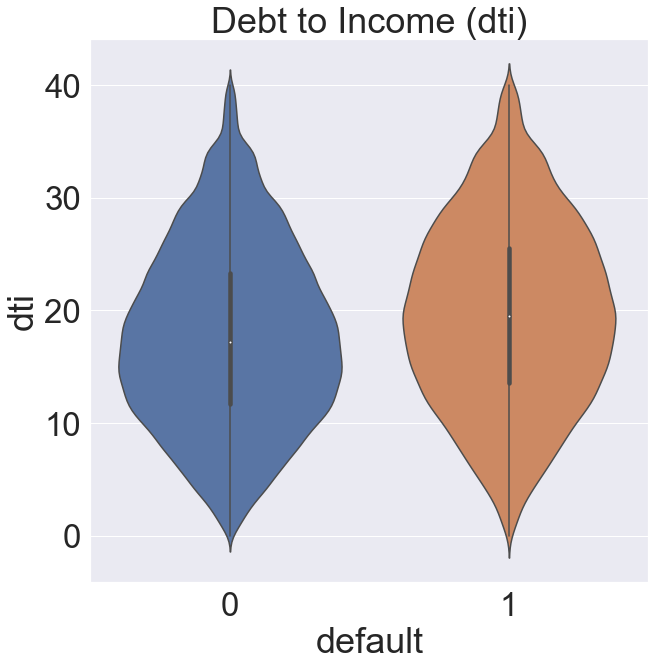

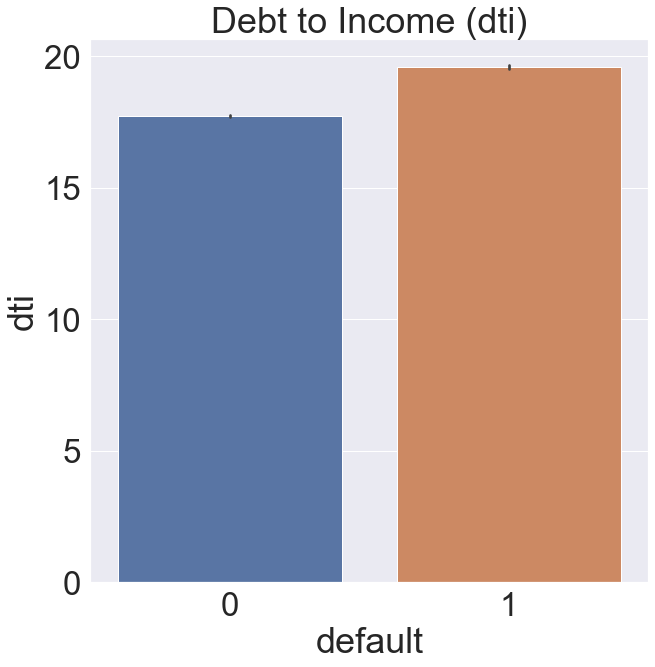

In [33]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='default', y='dti', data=lc).set_title('Debt to Income (dti)')

plt.figure(figsize=(10, 10))
sns.barplot(data=lc,
  x = 'default',
  y = 'dti',
  estimator=np.mean).set_title('Debt to Income (dti)')

In [34]:
# dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
lc['monthly_inc'] =  lc['annual_inc'] / 12
lc['monthly_debt'] =  lc['monthly_inc'] * lc['dti'] * 0.01

lc['debt_to_income_including_lc'] = (lc['monthly_debt'] + lc['installment']) / lc['monthly_inc']
lc.drop(["monthly_inc"], axis=1, inplace=True)

Text(0.5, 1.0, 'Debt to Income Including New Loan')

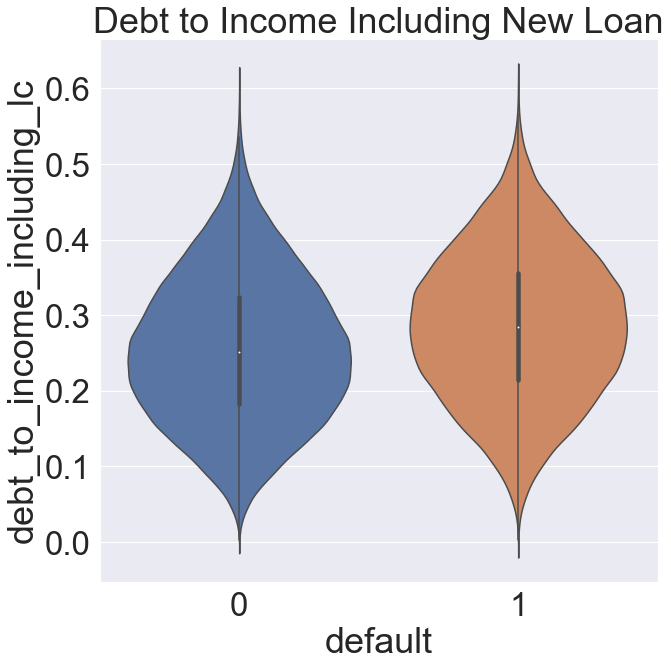

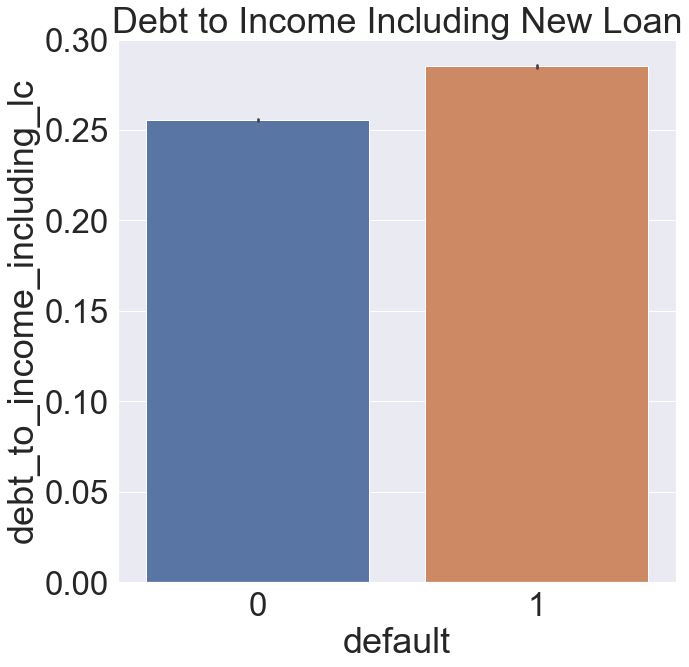

In [35]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='default', y='debt_to_income_including_lc', data=lc).set_title('Debt to Income Including New Loan')

plt.figure(figsize=(10, 10))
sns.barplot(data=lc,
  x = 'default',
  y = 'debt_to_income_including_lc',
  estimator=np.mean).set_title('Debt to Income Including New Loan')

Text(0.5, 1, 'Correlation with Debt')

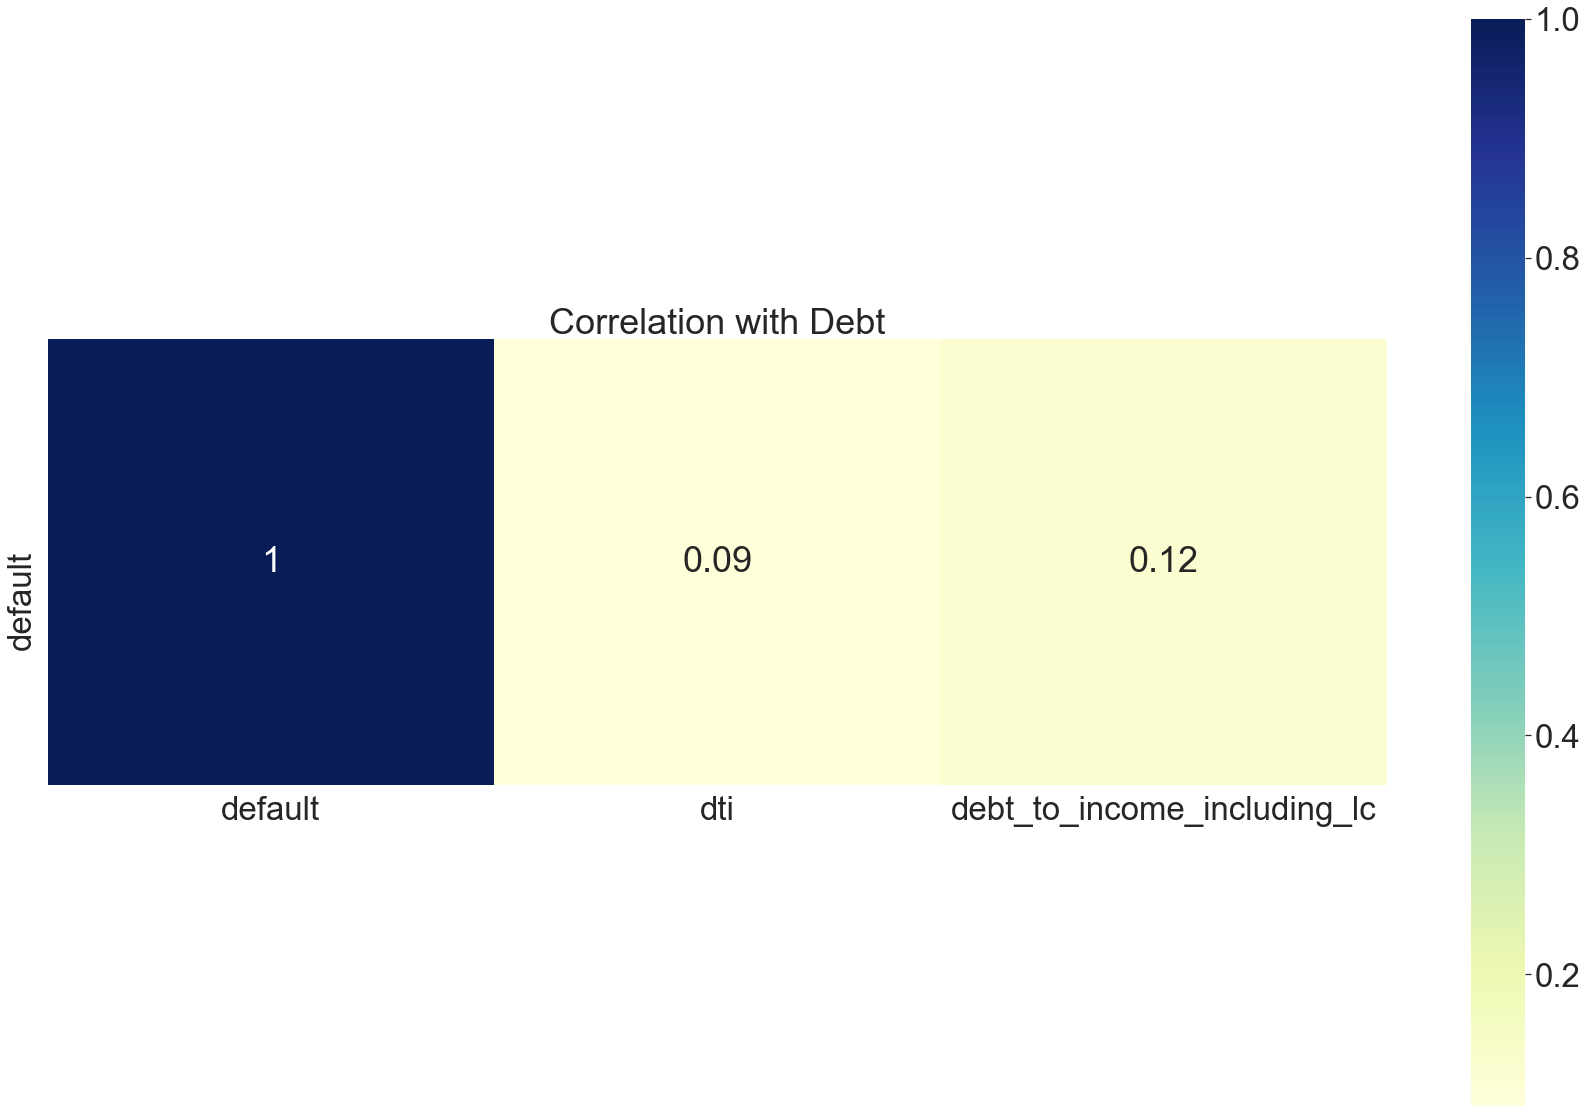

In [36]:
lc_small = lc[['default', 'dti', 'debt_to_income_including_lc']]
corr_mat = lc_small.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
sns.heatmap(corr_mat[['default']].transpose(), vmax=1, square=True, annot=True, cmap="YlGnBu").set_title('Correlation with Debt')

#### 3) How impactful are the settlements on the default rate?

Text(0.5, 1, 'Correlation with Debt')

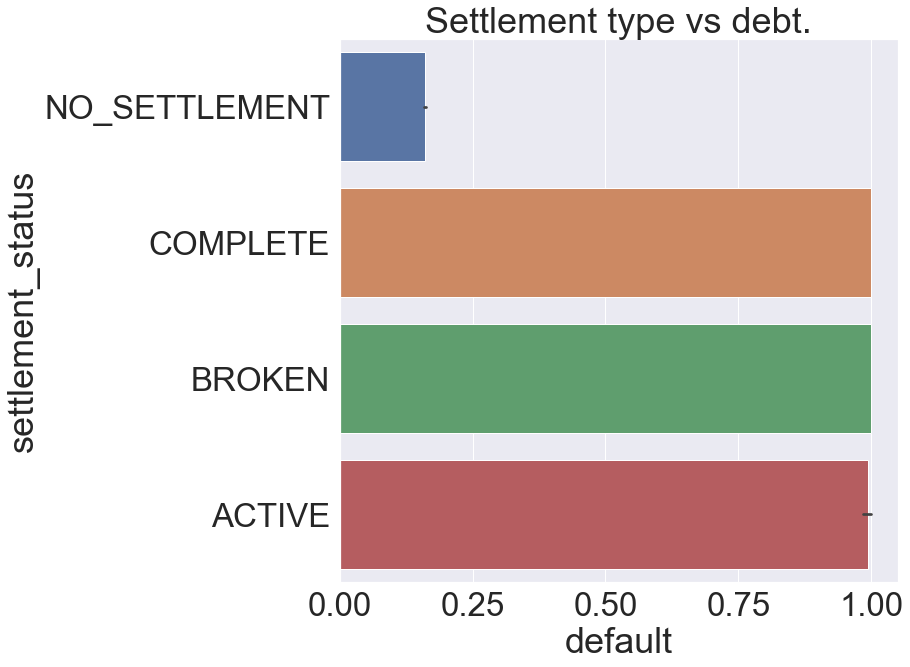

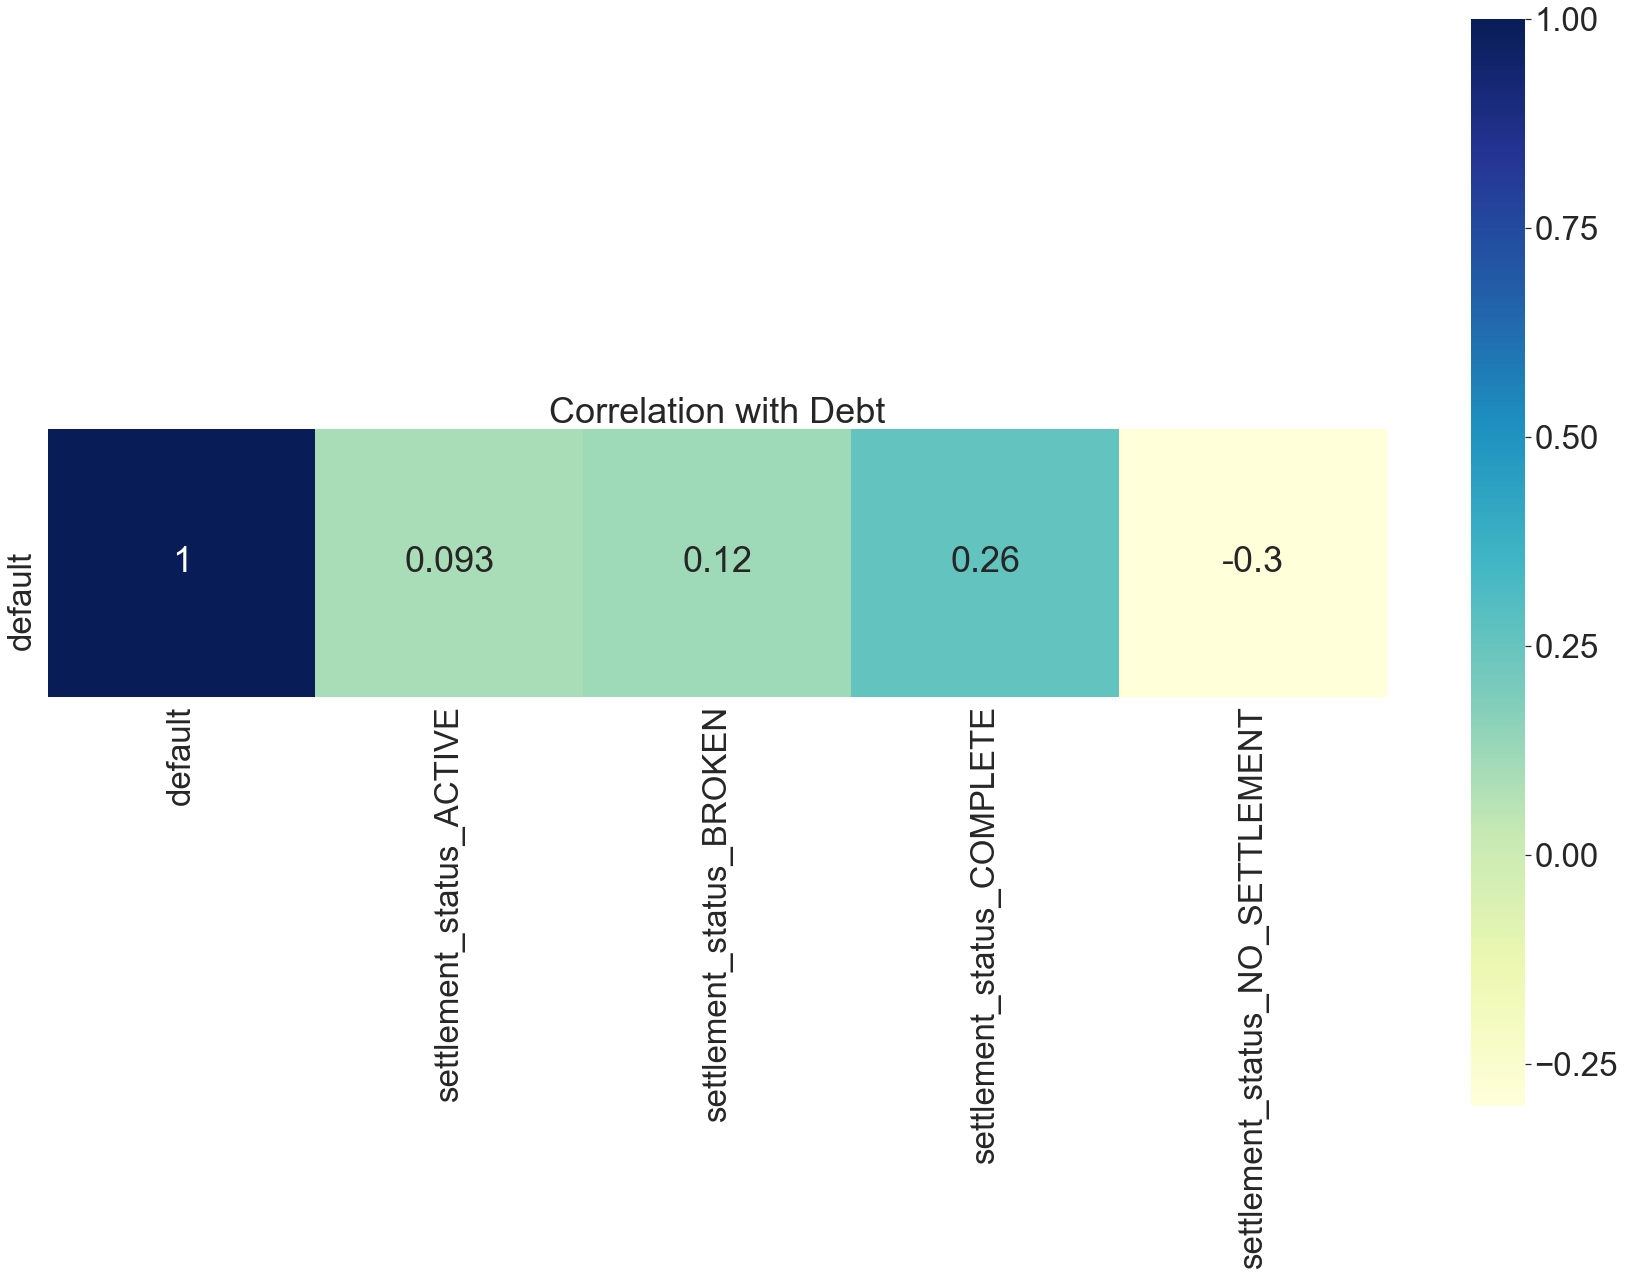

In [37]:
lc_small = lc[['default', 'settlement_status']]

plt.figure(figsize=(10, 10))
sns.barplot(data=lc,
  x = 'default',
  y = 'settlement_status',
  estimator=np.mean).set_title('Settlement type vs debt.')

lc_small = lc_small.join(pd.get_dummies(lc_small.settlement_status, 'settlement_status'))
lc_small.drop(['settlement_status'],axis=1,inplace=True)

corr_mat = lc_small.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
sns.heatmap(corr_mat[['default']].transpose(), vmax=1, square=True, annot=True, cmap="YlGnBu").set_title('Correlation with Debt')

#### 4) How impactful are hardships on default rate?

Text(0.5, 1, 'Correlation with Debt')

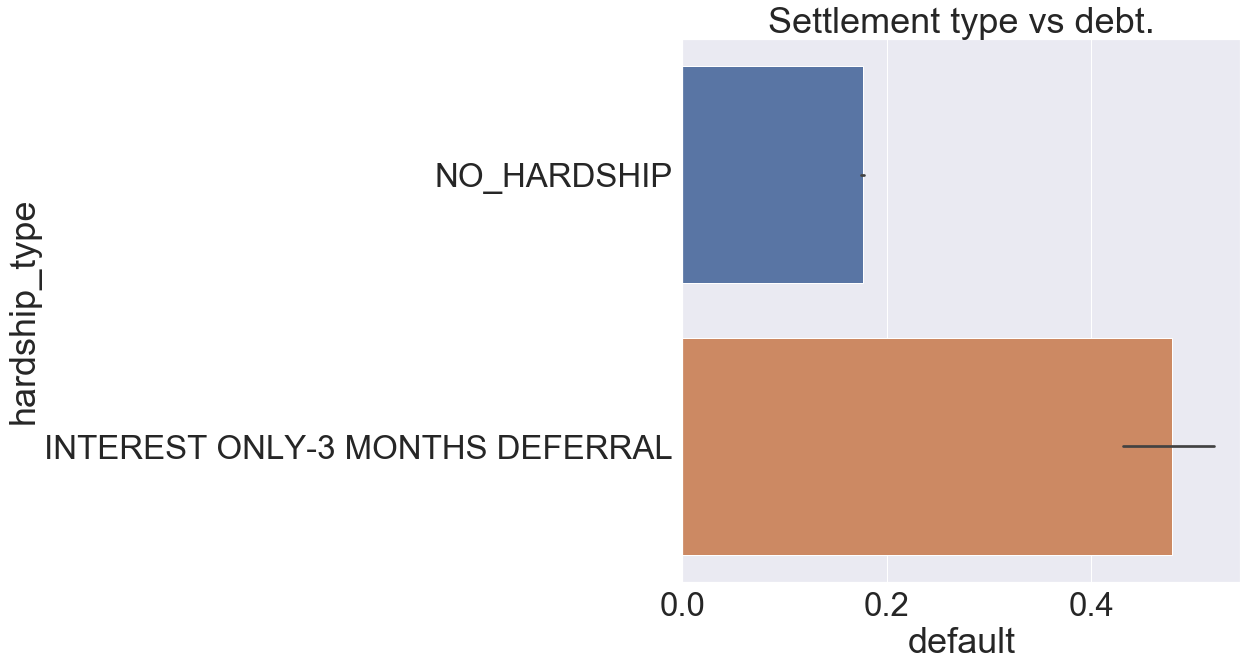

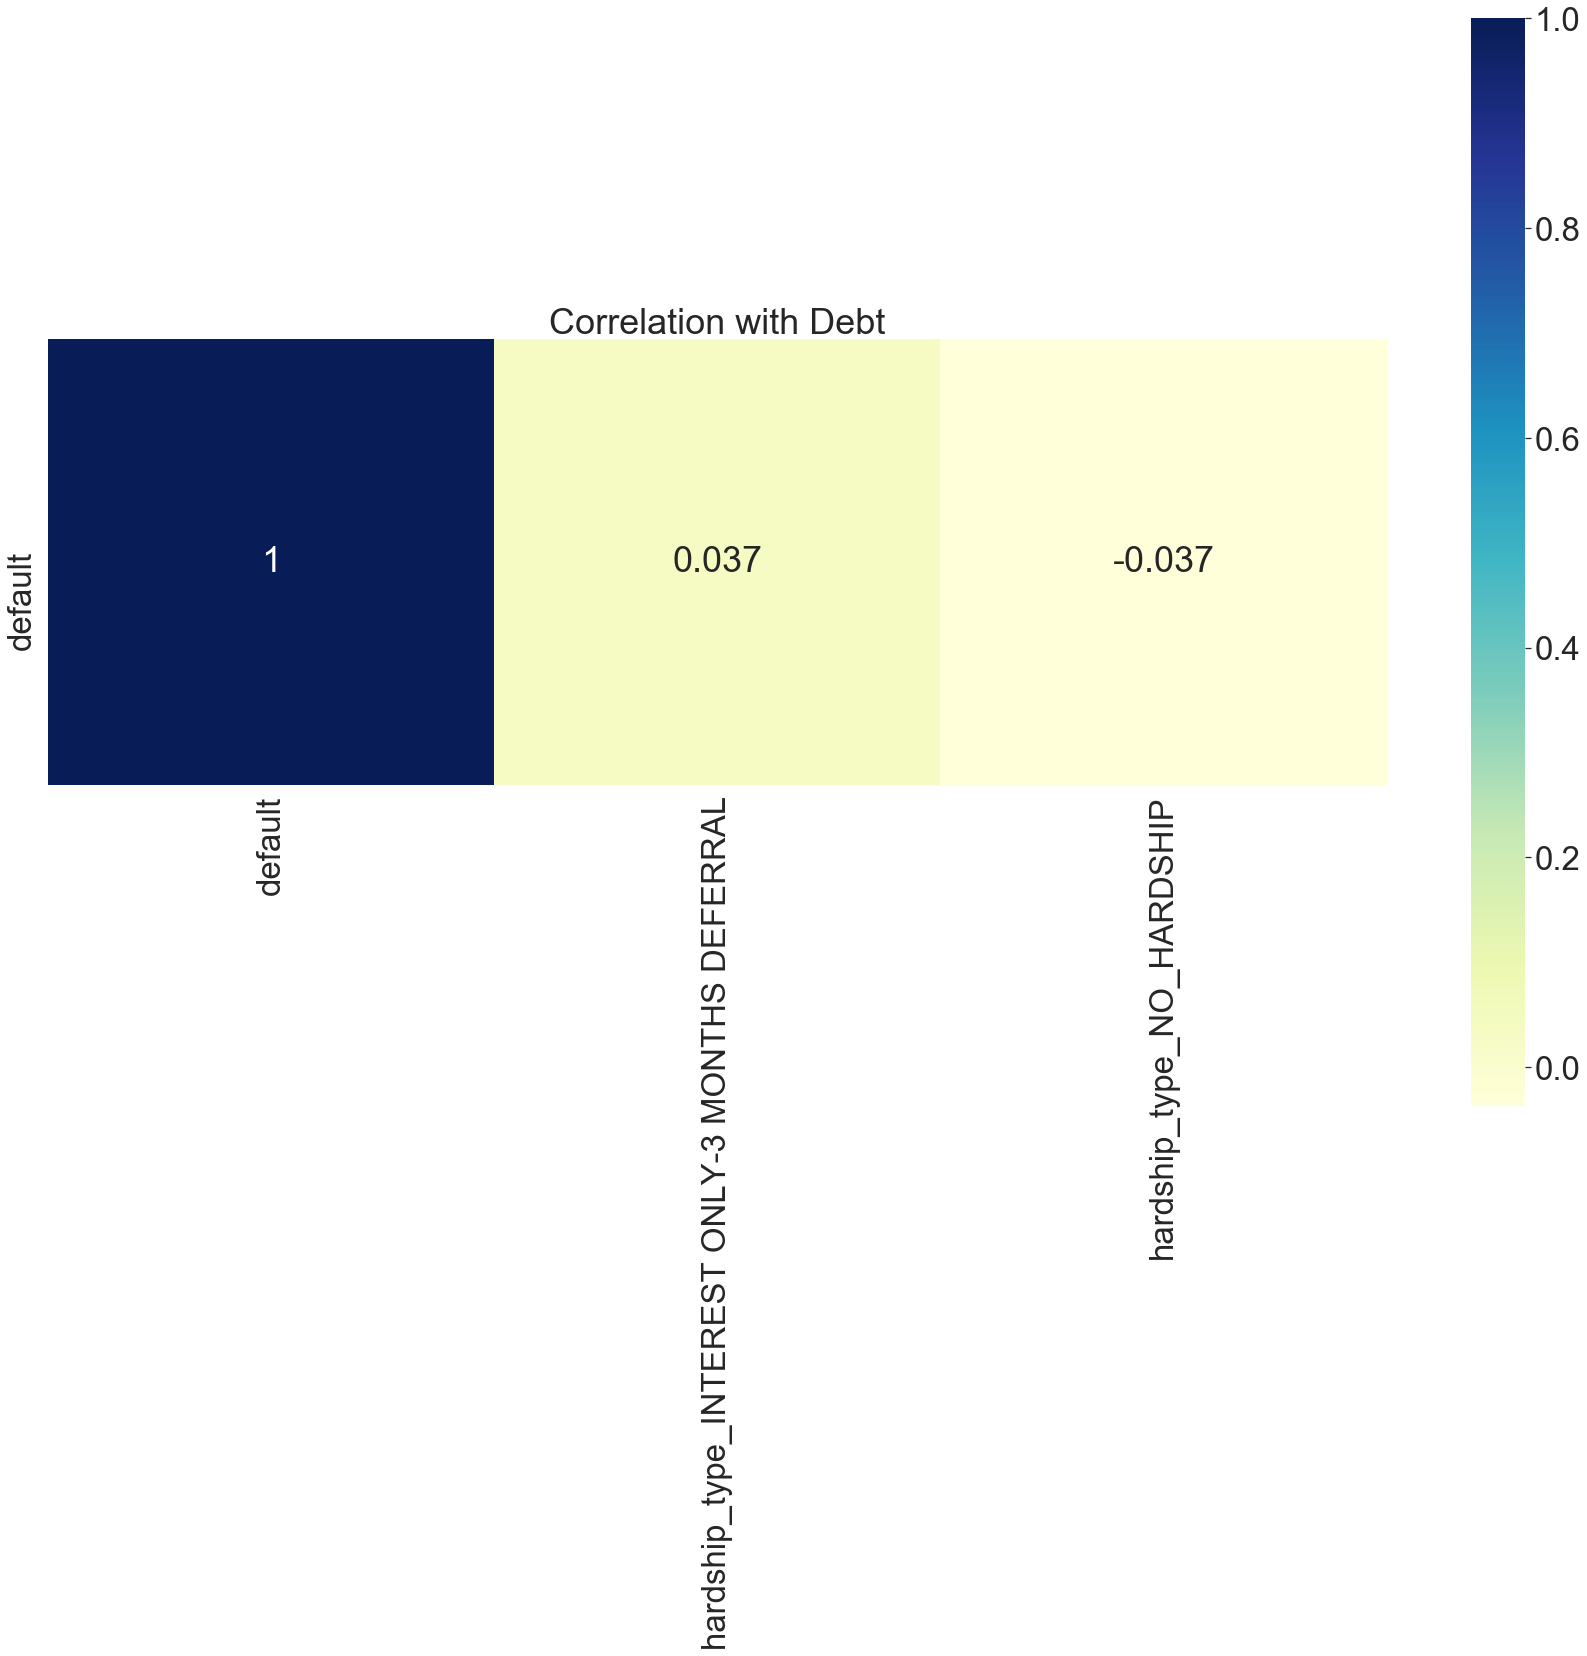

In [38]:
lc_small = lc[['default', 'hardship_type']]

plt.figure(figsize=(10, 10))
sns.barplot(data=lc,
  x = 'default',
  y = 'hardship_type',
  estimator=np.mean).set_title('Settlement type vs debt.')

lc_small = lc_small.join(pd.get_dummies(lc_small.hardship_type, 'hardship_type'))
lc_small.drop(['hardship_type'],axis=1,inplace=True)

corr_mat = lc_small.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
sns.heatmap(corr_mat[['default']].transpose(), vmax=1, square=True, annot=True, cmap="YlGnBu").set_title('Correlation with Debt')

#### 5) Which of the most common jobs are most likely to default?

''

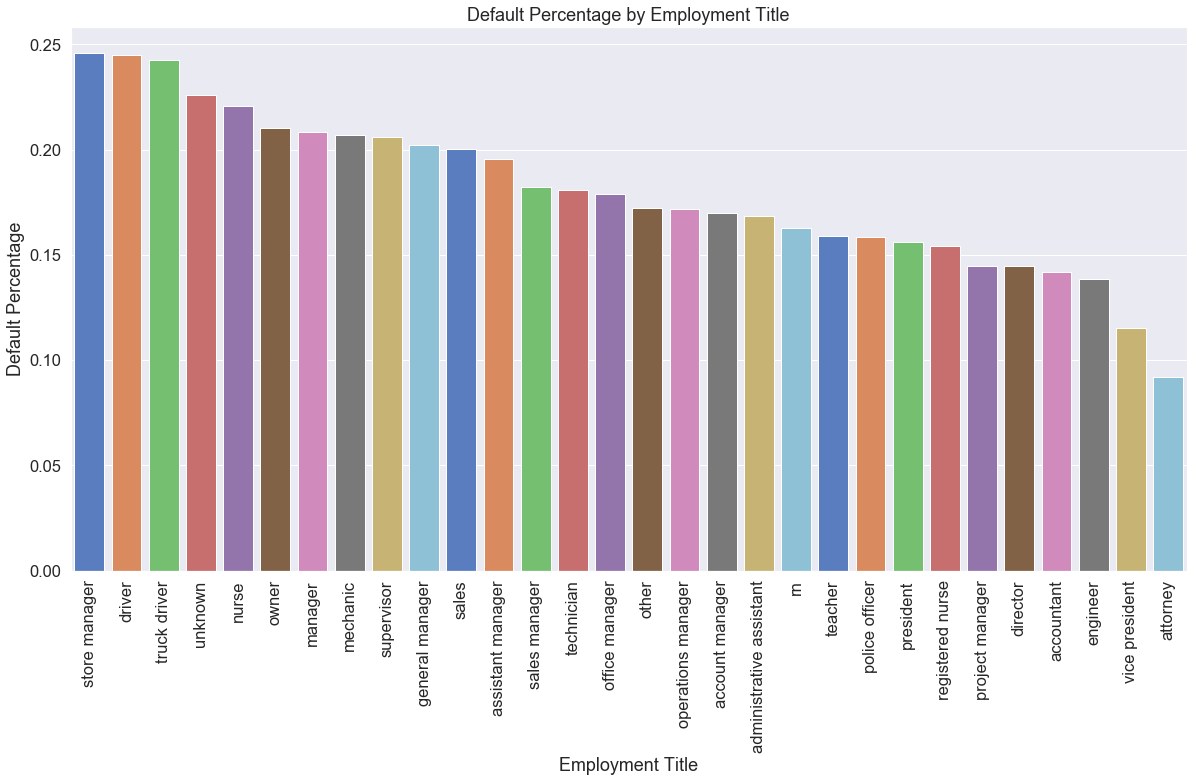

In [39]:
plt.figure(figsize=(20, 10))
lc_small = lc.groupby('emp_title').agg({'emp_title' : ['count'], 'default' : ['mean']}).reset_index()
lc_small = lc_small['emp_title'].join(lc_small['default'])
lc_small = lc_small.sort_values(
    "count", ascending=False).head(30).reset_index()
lc_small.columns = ['index', 'emp_title', 'count', 'mean']
lc_small = lc_small.sort_values("mean", ascending=False)
sns.set(font_scale=1.5)

ax = sns.barplot(
  x = 'emp_title',
  y = 'mean',
  data=lc_small,
  palette=sns.color_palette("muted"))
ax.set(xlabel='Employment Title', ylabel='Default Percentage', title='Default Percentage by Employment Title')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
''

#### 6) Which of the most common jobs pay the most?

''

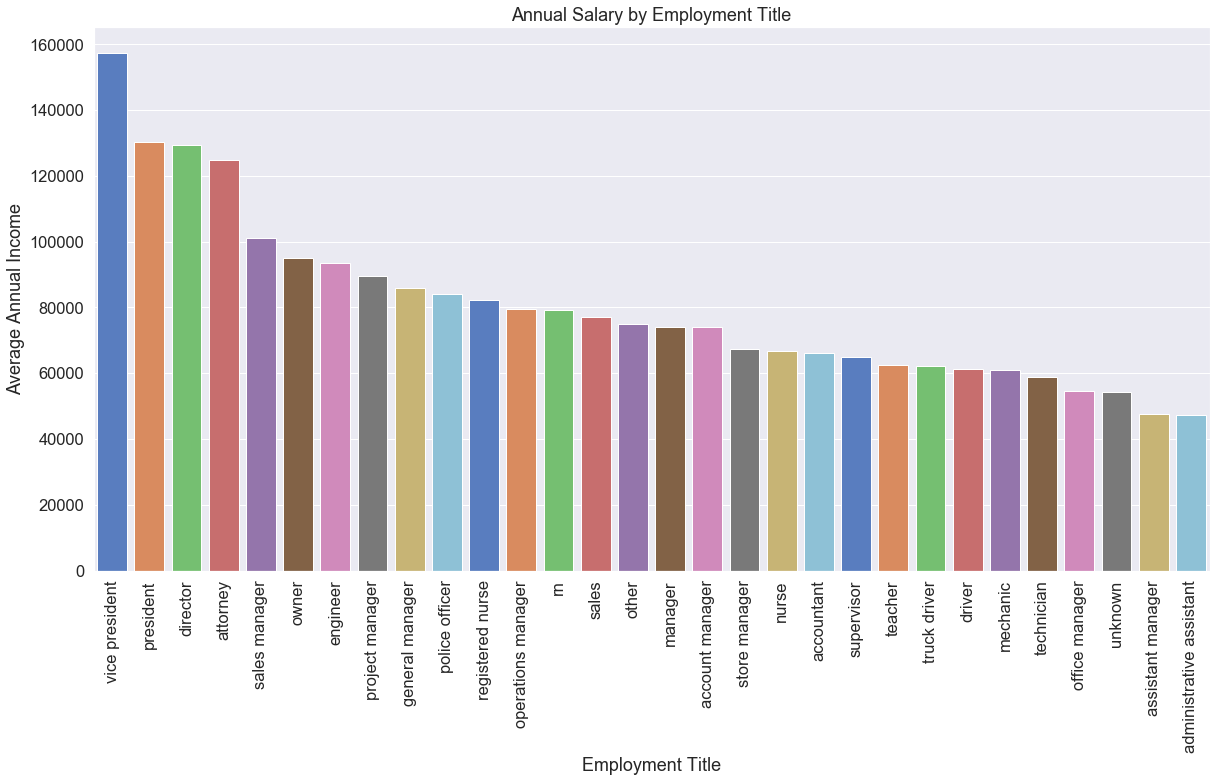

In [40]:
plt.figure(figsize=(20, 10))
lc_small = lc.groupby('emp_title').agg({'emp_title' : ['count'], 'annual_inc' : ['mean']}).reset_index()
lc_small = lc_small['emp_title'].join(lc_small['annual_inc'])
lc_small = lc_small.sort_values(
    "count", ascending=False).head(30).reset_index()
lc_small.columns = ['index', 'emp_title', 'count', 'mean']
lc_small = lc_small.sort_values("mean", ascending=False)
sns.set(font_scale=1.5)

ax = sns.barplot(
  x = 'emp_title',
  y = 'mean',
  data=lc_small,
  palette=sns.color_palette("muted"))
ax.set(xlabel='Employment Title', ylabel='Average Annual Income', title='Annual Salary by Employment Title')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

''

#### 7) Do settlements happen equally across different months?

In [41]:
lc.settlement_status.unique()

array(['NO_SETTLEMENT', 'COMPLETE', 'BROKEN', 'ACTIVE'], dtype=object)

In [42]:
small_lc = lc['settlement_status'] != 'NO_SETTLEMENT'



''

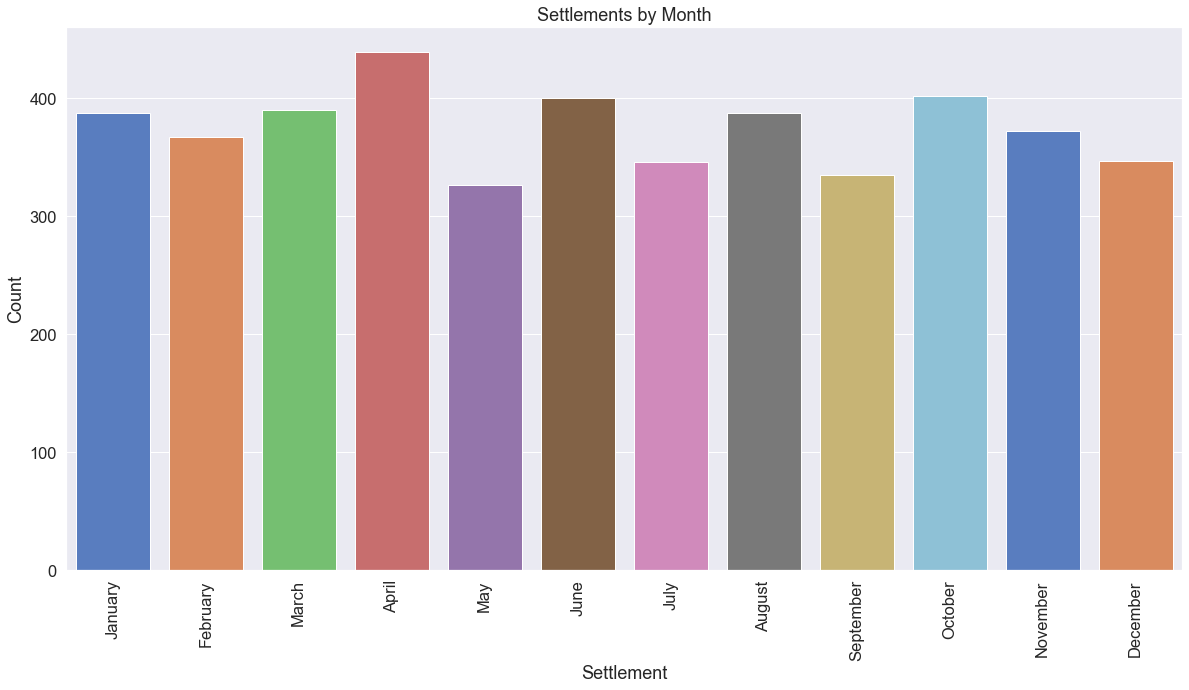

In [43]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

lc_small = lc[lc['settlement_status'] != 'NO_SETTLEMENT']
lc_small = lc_small.groupby('settlement_date_month').agg({'settlement_date_month' : ['count']}) \
  .settlement_date_month.reset_index().set_index('settlement_date_month').reindex(months)
lc_small['months'] = lc_small.index

plt.figure(figsize=(20, 10))
ax = sns.barplot(
  x = 'months',
  y = 'count',
  data=lc_small,
  palette=sns.color_palette("muted"))
ax.set(xlabel='Settlement', ylabel='Count', title='Settlements by Month')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
''

#### 8) Is it more common to pay off the loan in specific months?

''

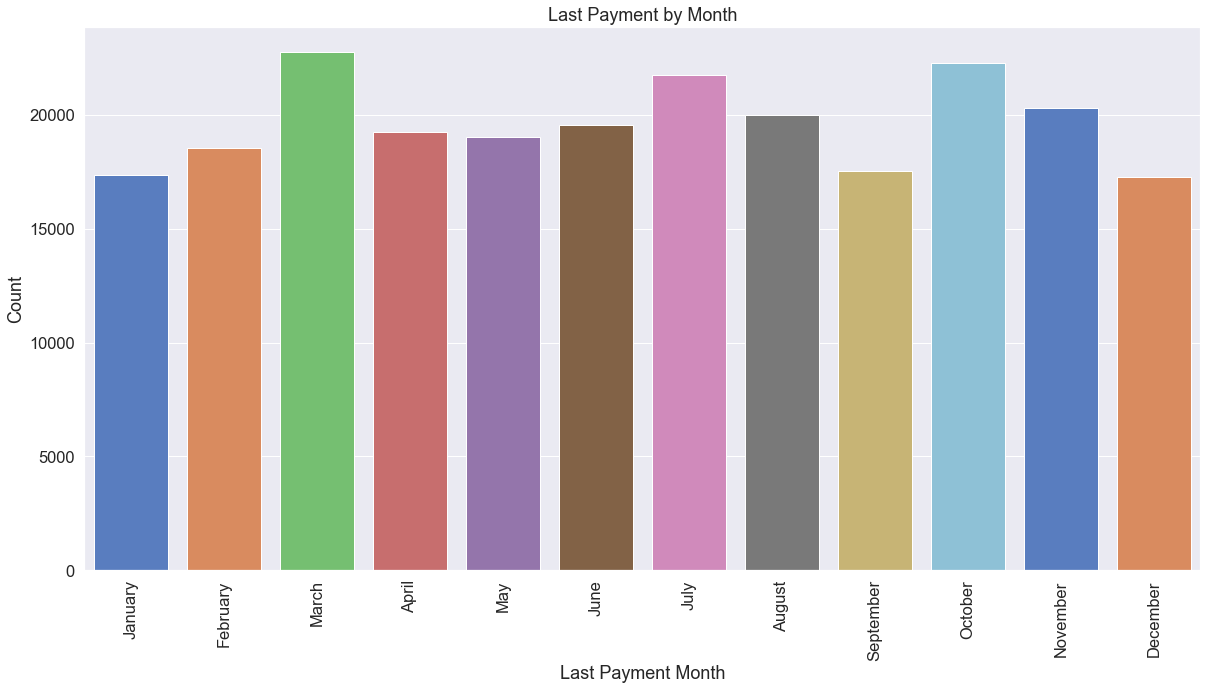

In [44]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

lc_small = lc.groupby('last_pymnt_d_month').agg({'last_pymnt_d_month' : ['count']}) \
  .last_pymnt_d_month.reset_index().set_index('last_pymnt_d_month').reindex(months)
lc_small['months'] = lc_small.index

plt.figure(figsize=(20, 10))
ax = sns.barplot(
  x = 'months',
  y = 'count',
  data=lc_small,
  palette=sns.color_palette("muted"))
ax.set(xlabel='Last Payment Month', ylabel='Count', title='Last Payment by Month')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
''

#### 9) How many years of experience do most people have?

''

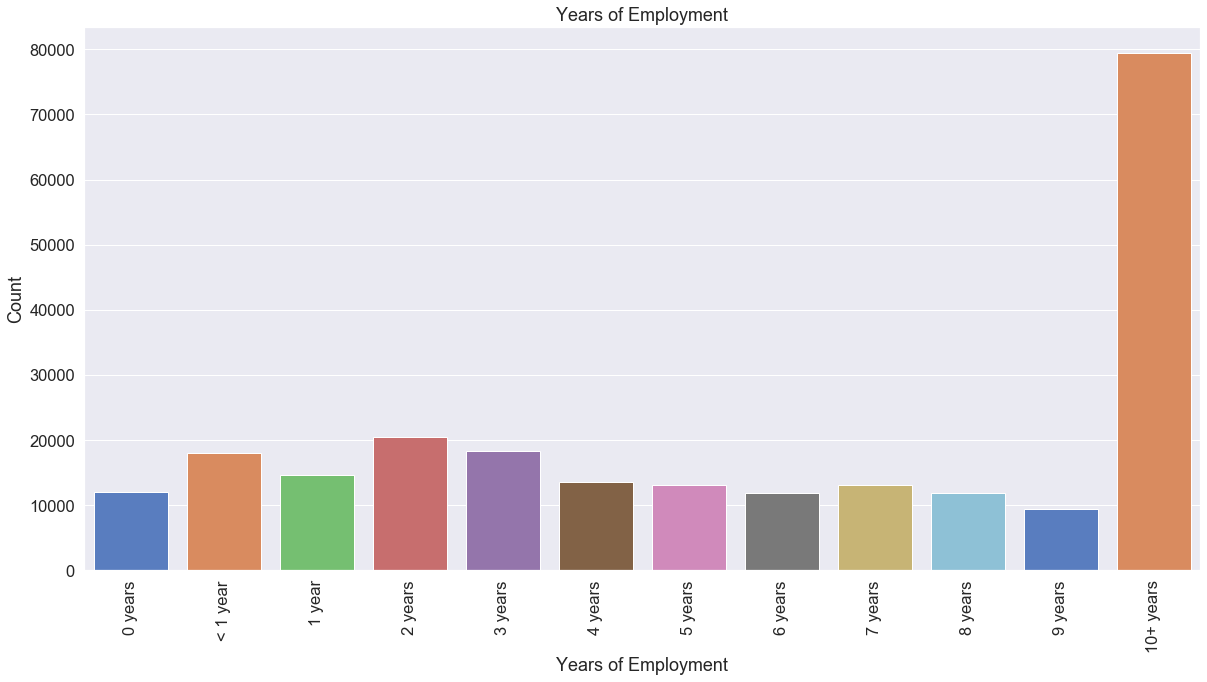

In [45]:
lc_small = lc[['default', 'emp_length']]
sort_order = [
 '0 years',
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
]
lc_small = lc_small.groupby('emp_length').agg({'emp_length' : ['count'], 'default' : ['mean']}).reset_index()
lc_small = lc_small['emp_length'].join(lc_small['default'])
lc_small.columns = ['emp_length','count','mean']
lc_small = lc_small.set_index('emp_length').reindex(sort_order)
lc_small['emp_length'] = lc_small.index

plt.figure(figsize=(20, 10))
ax = sns.barplot(
  x = 'emp_length',
  y = 'count',
  data=lc_small,
  palette=sns.color_palette("muted"))
ax.set(xlabel='Years of Employment', ylabel='Count', title='Years of Employment')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
''

#### 10) Which years of employment have the largest impact on default rate?

Text(0.5, 1, 'Correlation with Debt')

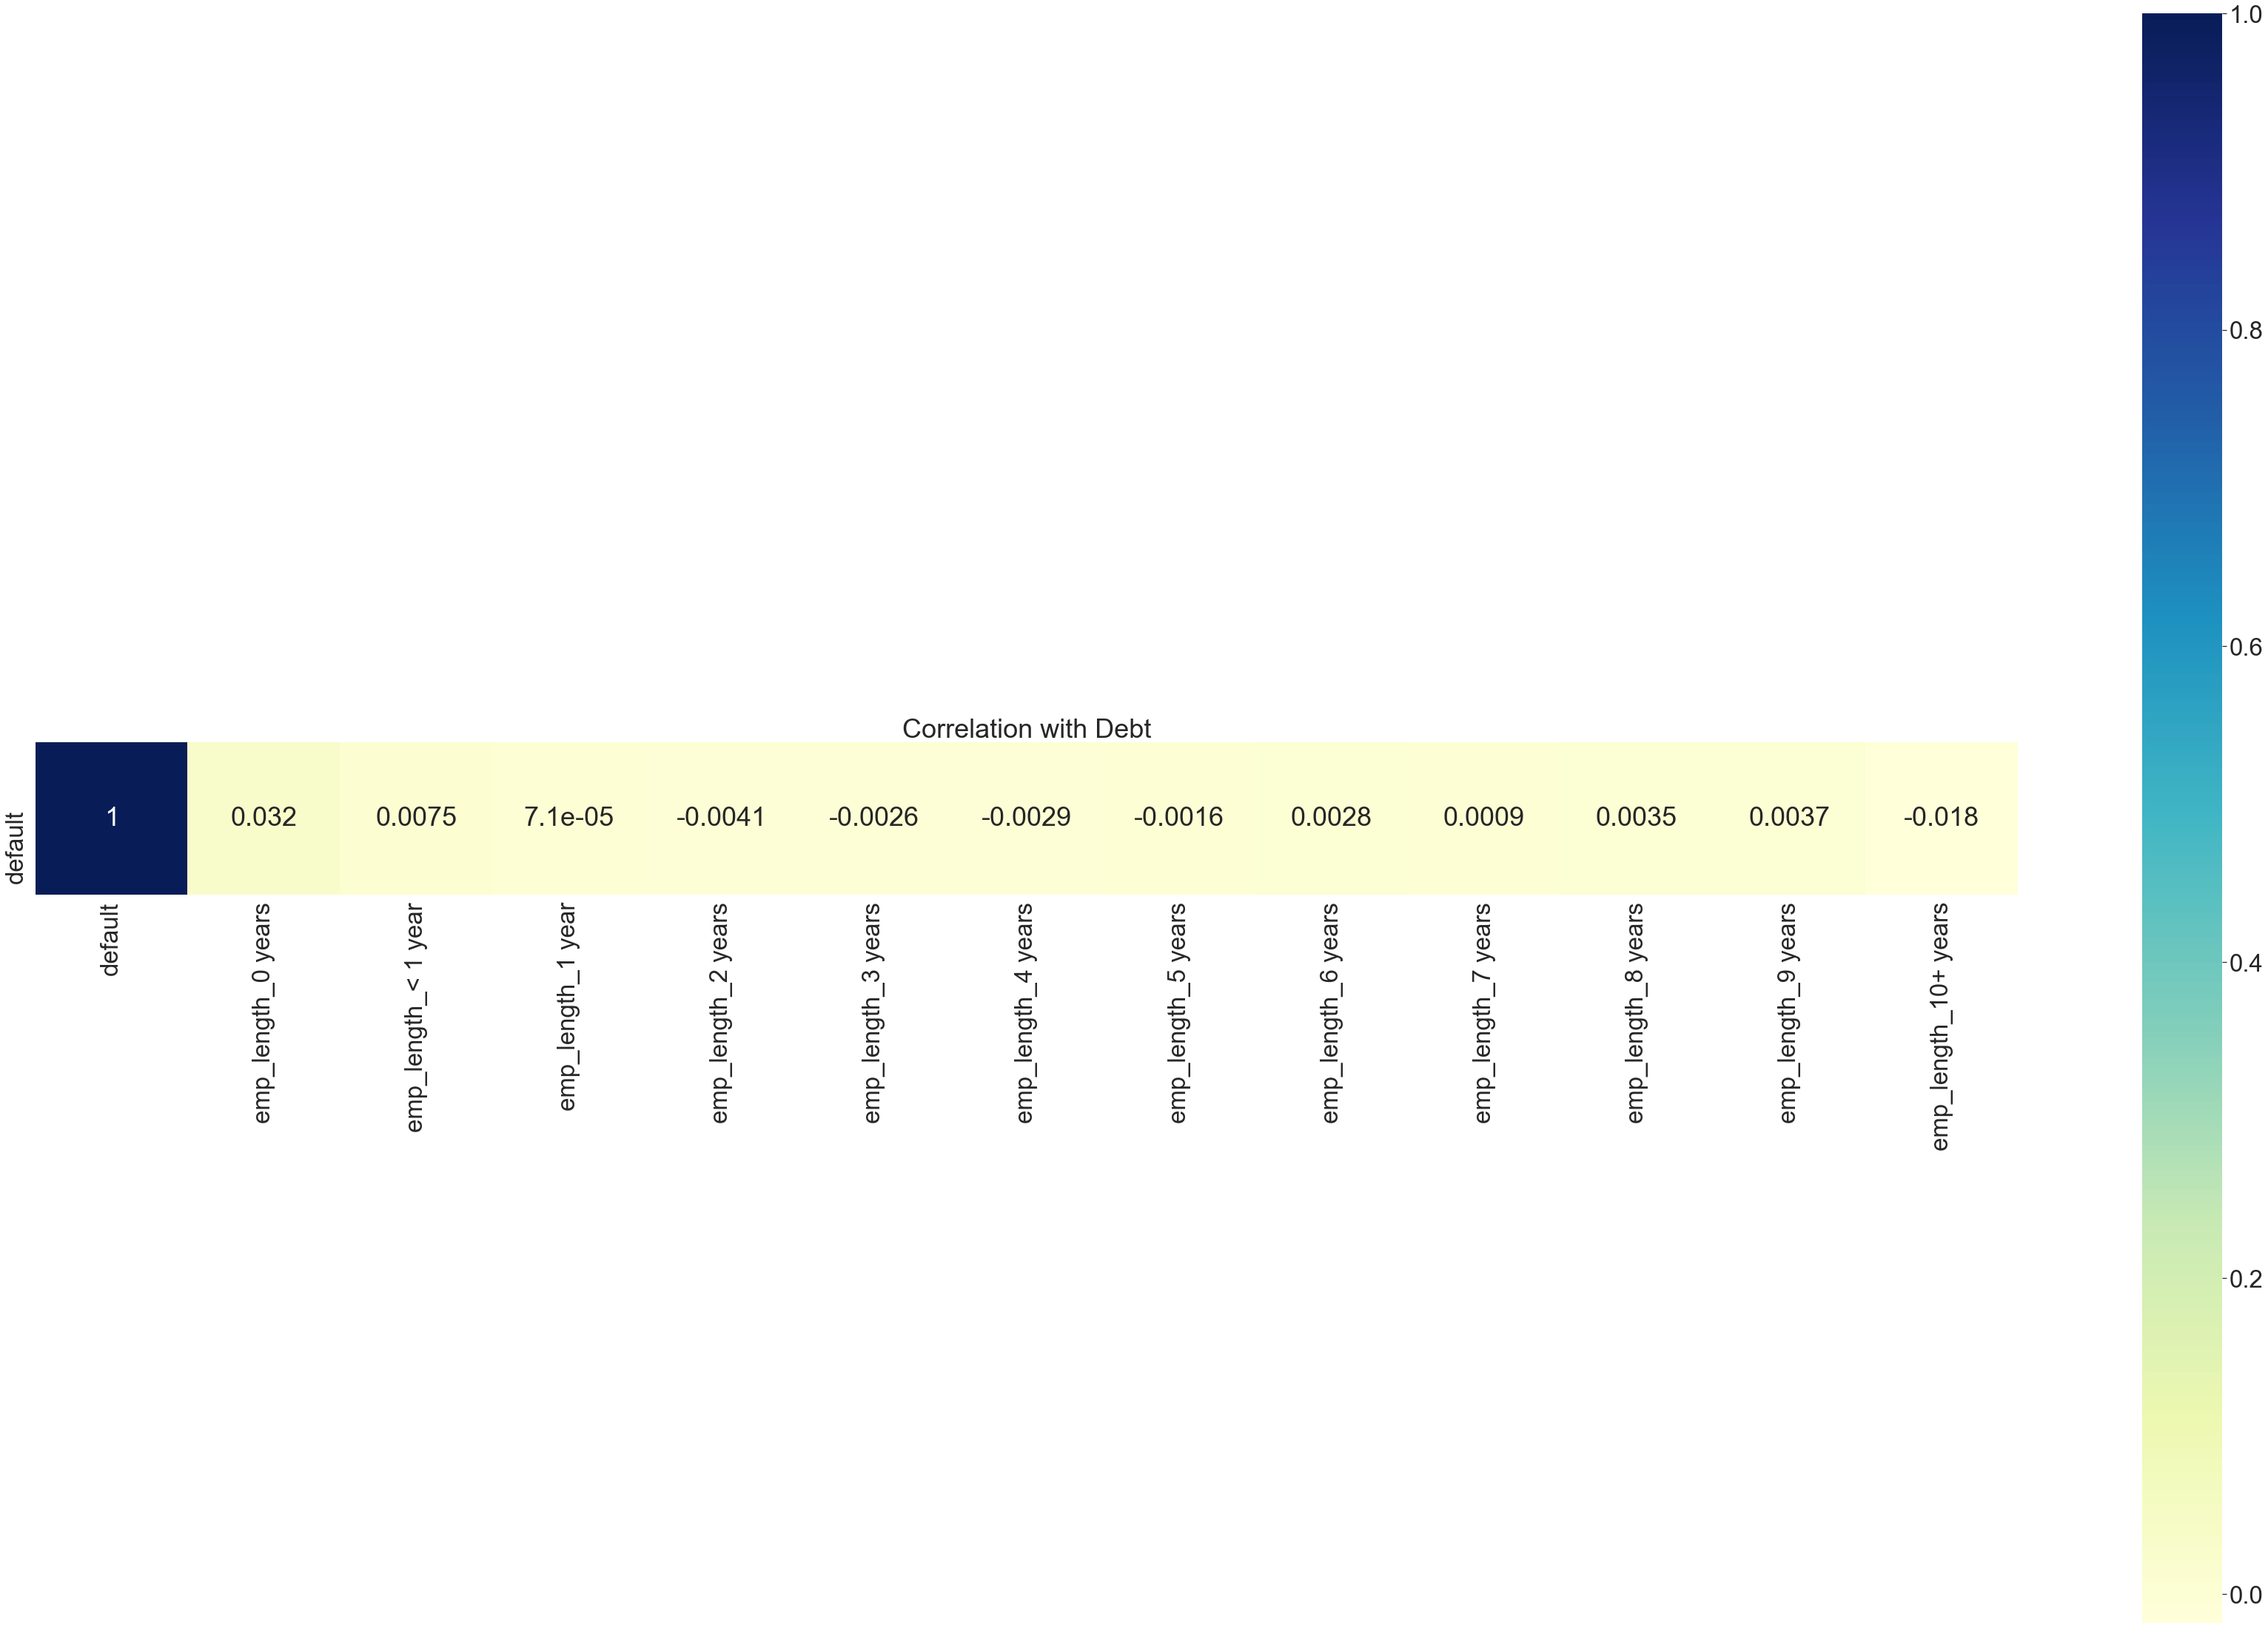

In [46]:
lc_small = lc[['default', 'emp_length']]
sort_order = [
 'default',
 'emp_length_0 years',
 'emp_length_< 1 year',
 'emp_length_1 year',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_10+ years',
]
lc_small = lc_small.join(pd.get_dummies(lc_small.emp_length, 'emp_length'))
lc_small.drop(['emp_length'],axis=1,inplace=True)

corr_mat = lc_small.corr(method='pearson')
plt.figure(figsize=(60,40))
sns.set(font_scale=3)
sns.heatmap(corr_mat[['default']].reindex(sort_order).transpose(), vmax=1, square=True, annot=True, cmap="YlGnBu").set_title('Correlation with Debt')

# Feature Engineering

### Remove features that are highly correlated 

In [47]:
corr_mat = lc.corr(method='pearson')
corr_pairs = corr_mat.abs().unstack().sort_values()
corr_pairs_over_90 = corr_pairs[corr_pairs != 1][corr_pairs >.90]
pd_corr_pairs_over_90 = lc[corr_pairs_over_90.index.map(lambda x: x[0]).to_numpy()]

In [48]:
corr_pairs_over_90

dti                             debt_to_income_including_lc       0.920353
debt_to_income_including_lc     dti                               0.920353
funded_amnt_inv                 installment                       0.947864
installment                     funded_amnt_inv                   0.947864
                                loan_amnt                         0.947899
loan_amnt                       installment                       0.947899
hardship_dpd                    default                           0.950540
default                         hardship_dpd                      0.950540
total_rec_prncp                 total_pymnt_inv                   0.958964
total_pymnt_inv                 total_rec_prncp                   0.958964
total_rec_prncp                 total_pymnt                       0.958979
total_pymnt                     total_rec_prncp                   0.958979
recoveries                      collection_recovery_fee           0.973292
collection_recovery_fee  

In [49]:
unique_corr_pairs_over_90 = []
for index1, index2 in corr_pairs_over_90.index:
    if [index2, index1] not in unique_corr_pairs_over_90:
        if index1 != 'default' and index2 != 'default':
            unique_corr_pairs_over_90.append([index1, index2])

column_to_delete = []
for pair in unique_corr_pairs_over_90:
    pair.append('default')
    corr_mat = lc[pair].corr(method='pearson').abs()
    corr_mat.drop(["default"], inplace=True)
    corr_mat = corr_mat.sort_values(by=['default'])
    index1, index2 = corr_mat.index.to_numpy()
    padded_index1 = index1.ljust(30, ' ')
    padded_index2 = index2.ljust(30, ' ')
    corr_indexes = corr_mat[index1][index2]
    index1_corr_default = corr_mat.loc[index1].default
    index2_corr_default = corr_mat.loc[index2].default
    print(f'{corr_indexes} is the correlation between "{index1}" and "{index2}".')
    print(f'{padded_index1} correlation with default is: {index1_corr_default}')
    print(f'{padded_index2} correlation with default is: {index2_corr_default}')
    if index1_corr_default > index2_corr_default:
        print(f'We will delete {index2} because {index1} has a higher correlation with default.')
        column_to_delete.append(index2)
    else:
        print(f'We will delete {index1} because {index2} has a higher correlation with default.')
        column_to_delete.append(index1)
    print('\n')

lc.drop(list(set(column_to_delete)), axis=1, inplace=True)

0.9203531458405904 is the correlation between "dti" and "debt_to_income_including_lc".
dti                            correlation with default is: 0.09007900158041957
debt_to_income_including_lc    correlation with default is: 0.115034351241208
We will delete dti because debt_to_income_including_lc has a higher correlation with default.


0.9478636458495493 is the correlation between "installment" and "funded_amnt_inv".
installment                    correlation with default is: 0.022662037085275023
funded_amnt_inv                correlation with default is: 0.04103554208444288
We will delete installment because funded_amnt_inv has a higher correlation with default.


0.9478987669565179 is the correlation between "installment" and "loan_amnt".
installment                    correlation with default is: 0.022662037085275023
loan_amnt                      correlation with default is: 0.041025297157318896
We will delete installment because loan_amnt has a higher correlation with default.


## Remove features that we won't have when predicting future loans

In [50]:
# We calculated our dependent variable directly with this.
lc.drop(['loan_status'], axis=1, inplace=True)
# Hardship happens after the loan defaults, so we know that loans with hardship have defaulted.
hardship_features = [col for col in lc.columns if 'hardship' in col]
lc.drop(hardship_features, axis=1, inplace=True)

# Settlement happens after the loan defaults, so we know that loans with hardship have defaulted.
settlement_features = [col for col in lc.columns if 'settlement' in col]
lc.drop(settlement_features, axis=1, inplace=True)

## Remove features with only one value.

In [51]:
unique_count = lc.nunique()
lc.drop(unique_count[unique_count == 1].index.to_numpy(), axis=1, inplace=True)

## Remove features that are not correlated with default.

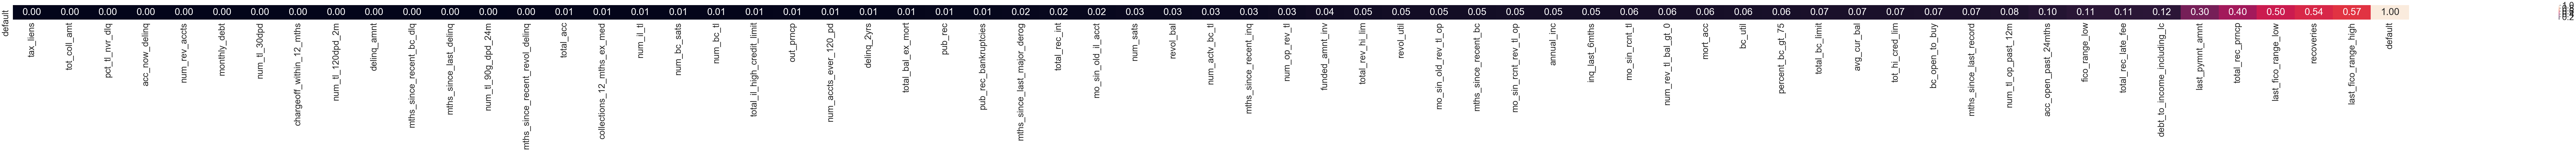

In [52]:
num = lc.select_dtypes(exclude = 'object')
numcorr = num.corr()
f, ax = plt.subplots(figsize = (200,1))
numcorr.sort_values(by = 'default', ascending = False).head(1)
corr_with_default = numcorr.sort_values(by = 'default', ascending = False).head(1)
corr_with_default = abs(corr_with_default).sort_values(by ='default', axis=1)
sns.heatmap(corr_with_default, annot = True, fmt=".2f")
plt.show()

''

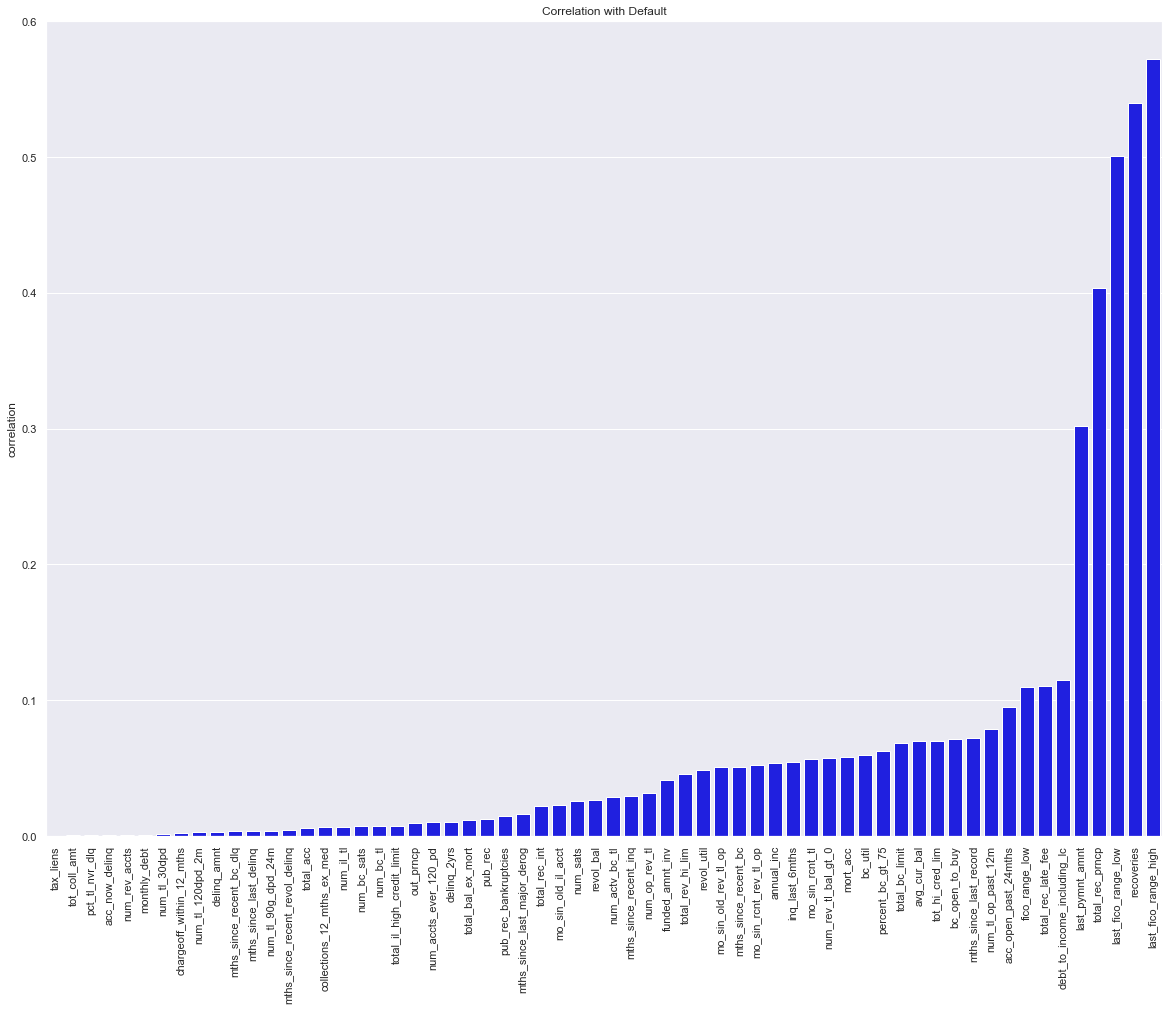

In [53]:
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
small_corr = numcorr['default'].abs().sort_values(ascending=True).to_frame()
small_corr = small_corr.drop('default')
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=small_corr)
small_corr['items'] = small_corr.index
ax = sns.barplot(x="items", y="default", data=small_corr, color="blue")
ax.set(xlabel='', ylabel='correlation', title='Correlation with Default')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
''

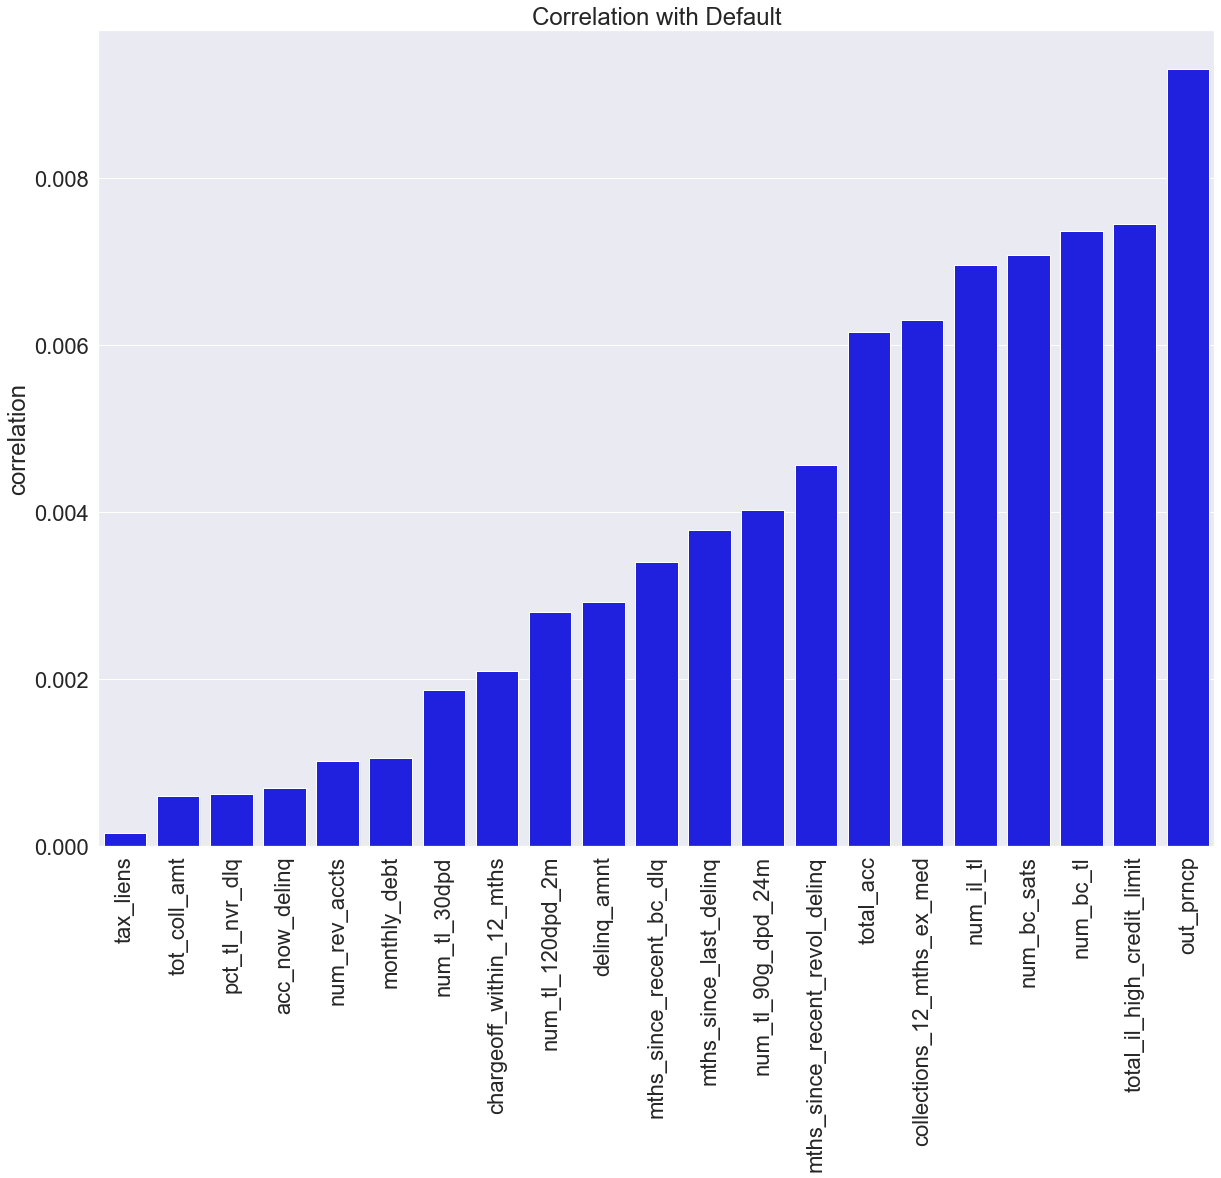

In [54]:
sns.set(font_scale=2)
plt.figure(figsize=(20,15))
small_corr = numcorr['default'].abs().sort_values(ascending=True).to_frame()
small_corr = small_corr[small_corr['default'] < 0.01]
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=small_corr)
small_corr['items'] = small_corr.index
ax = sns.barplot(x="items", y="default", data=small_corr, color="blue")
ax.set(xlabel='', ylabel='correlation', title='Correlation with Default')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
lc.drop(small_corr['items'].to_numpy(), axis=1, inplace=True)

In [55]:
corr_mat = lc.corr(method='pearson').abs()
plt.figure(figsize=(300,200))
sns.heatmap(corr_mat, vmax=1, square=True, annot=True, cmap='cubehelix')

# One hot encode

In [56]:
full_x = lc.drop(['default'], axis=1)
y = lc.default
obj_features = full_x.dtypes[full_x.dtypes == object].index.to_numpy()

for feature in obj_features:
    print(datetime.now())
    print(f'working on feature: {feature}')
    dummyZoning = pd.get_dummies(full_x[feature])
    dummyZoning = dummyZoning.add_prefix(feature + " ")
    full_x = full_x.join(dummyZoning)
    full_x.drop([feature], axis=1, inplace=True)

2020-04-08 18:36:38.861004
working on feature: term
2020-04-08 18:36:39.418725
working on feature: emp_title
2020-04-08 18:37:52.407235
working on feature: emp_length
2020-04-08 18:37:59.059318
working on feature: home_ownership
2020-04-08 18:38:05.343264
working on feature: verification_status
2020-04-08 18:38:11.587812
working on feature: issue_d
2020-04-08 18:38:17.787965
working on feature: purpose
2020-04-08 18:38:24.040737
working on feature: title
2020-04-08 18:38:30.290472
working on feature: zip_code
2020-04-08 18:38:41.394697
working on feature: addr_state
2020-04-08 18:38:53.289274
working on feature: initial_list_status
2020-04-08 18:39:03.544258
working on feature: earliest_cr_line_month
2020-04-08 18:39:10.306222
working on feature: earliest_cr_line_year
2020-04-08 18:39:19.658804
working on feature: last_pymnt_d_month
2020-04-08 18:39:27.262407
working on feature: last_pymnt_d_year
2020-04-08 18:39:36.048286
working on feature: last_credit_pull_d_month
2020-04-08 18:39:4

# K-Folds Sample

In [57]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([6, 7, 8, 9])
kf = KFold(n_splits=2)
kf.get_n_splits(X)


2

In [58]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [59]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [60]:
y_train

array([6, 7])

# K-Folds with our data

In [83]:
X = full_x.values
y = lc.default.values
# there might be a unique or scramble option i should use.
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [117804 117805 117806 ... 235604 235605 235606] TEST: [     0      1      2 ... 117801 117802 117803]
TRAIN: [     0      1      2 ... 117801 117802 117803] TEST: [117804 117805 117806 ... 235604 235605 235606]


In [84]:
# this should happen in the above loop to do it each time. but im just doing it once for now.
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [85]:
reg = linear_model.LogisticRegression() 
reg.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = reg.predict(X_test) 

In [87]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 99.78014142254442


In [67]:

for i in reg.coef_[0]:
    print(i)

0.009221406511098618
3.6048159099773377e-07
-1.9890455621128945e-07
0.0019123828528034817
1.2709705449545942e-05
0.000281431873536325
1.3571249302343686e-05
3.892514530651444e-06
0.00024913141549581336
-0.009171792074076587
-0.001133134914769009
3.0485126812633403e-06
0.006762168631392018
-0.0004811153515024079
-0.005431501657204174
-0.0036328569248471744
0.0002905379381384797
3.880320697193165e-07
7.762198179683653e-05
1.1792340253978364e-05
7.240243653920812e-06
0.0005666215609246901
-9.575407546012409e-05
0.0011264592608440224
-3.926069347755822e-05
6.552188317172939e-05
-1.224461156102455e-05
0.0003065606819028459
7.1324103240827054e-06
1.188727108256906e-05
4.615009262696274e-05
0.00011307950086980767
0.00010410938268158262
0.0001109733623904843
2.7699344229056403e-05
0.0005077753633339918
6.368037216705878e-06
-1.504368605874788e-06
1.1627987017211407e-06
-9.280684779127334e-06
2.7798723548776084e-06
6.163276207691001e-06
-2.3921321716084143e-06
0.0
0.0
-1.499895174678879e-13
0.0

-6.869593293202506e-10
-3.952445945818014e-14
-1.2186641862323852e-08
-2.306984481457841e-11
-2.023808083972687e-09
1.3108563761511874e-10
-4.706348482526666e-10
0.0
-6.261802446759239e-09
-2.648446700019325e-07
0.0
0.0
0.0
-1.338244079503167e-10
-2.108511746013917e-10
0.0
0.0
4.126410885733615e-07
3.0843942123250235e-11
-2.863423133611083e-11
0.0
0.0
-2.3347811575539674e-11
-5.099162459557839e-12
0.0
5.193666855342836e-12
-1.0038947140799958e-09
-2.492501093874526e-11
0.0
0.0
-3.0171624686819548e-12
2.0622787649281936e-12
4.257472413085885e-12
0.0
-3.4800597867143486e-09
-2.942178375508448e-10
0.0
-2.2670625197089942e-12
0.0
-1.5287414994019207e-10
-4.870366705869723e-10
0.0
-1.781297597657878e-10
-7.667443666234152e-10
0.0
-4.864861566114163e-09
-7.67831940163186e-10
0.0
0.0
0.0
-6.941637578655249e-10
-9.920903389926951e-10
-2.0081804082359917e-10
0.0
3.1159021271746906e-12
8.941349269605868e-12
2.1416189089266433e-12
-2.5774040775383307e-11
9.799187430415679e-12
0.0
3.12306904915477

0.0
0.0
-6.730904445725504e-08
0.0
-1.31479411828128e-10
-2.9344329654116414e-14
-9.243446915562504e-10
-4.920955013380942e-10
0.0
-2.5018561699409466e-12
2.083263196465456e-15
-2.173807019656659e-10
-9.696700100805568e-11
0.0
0.0
-4.467343583046054e-13
-1.2342859742201808e-10
0.0
0.0
0.0
0.0
1.3067299230409508e-08
-2.3552543975626878e-11
0.0
0.0
0.0
0.0
4.962664692846851e-11
-3.037190286684504e-08
-4.5708145128199417e-10
-1.9695840269776596e-09
1.1647538654206379e-11
-4.473466553485756e-10
-3.810078233079106e-09
0.0
-4.175125659446173e-10
-1.8118454788667244e-12
0.0
0.0
0.0
5.053587730598226e-09
0.0
0.0
0.0
-2.4941709701877407e-11
1.9264100625209143e-10
0.0
0.0
0.0
-3.4156731856225635e-09
0.0
-9.011040164100937e-10
0.0
-2.689917442048107e-10
0.0
-2.2584311395933846e-10
0.0
0.0
0.0
2.9711103414333232e-09
-1.8945620757591127e-09
-6.327296364288296e-10
0.0
0.0
0.0
0.0
-2.09588828122821e-11
3.6967439897817436e-10
0.0
-4.72889996873073e-09
0.0
-4.548677545511061e-09
0.0
-4.6117839156274005

7.447990847470786e-11
0.0
0.0
0.0
0.0
3.697705340626142e-12
4.369932025445122e-08
-2.380912894153833e-09
-5.3108034901706514e-09
0.0
-1.2690919440554677e-12
-8.651228639518398e-10
-3.1354537329437187e-10
4.4068538137222726e-12
0.0
-2.5050068683617644e-11
8.376148505059385e-12
0.0
-3.321414760669069e-12
-1.047720508532835e-12
-1.9827025252766412e-09
0.0
0.0
-2.7270278686833113e-09
-3.6941354020706124e-11
-2.529723593046521e-09
1.517368008198037e-11
0.0
-1.0296385239355266e-10
0.0
0.0
-1.9777415021541822e-13
0.0
6.997371161129342e-12
7.464328985292542e-12
0.0
-8.882062174646312e-14
0.0
-1.3791388586457045e-10
0.0
0.0
-3.3409990504555033e-11
-3.540519566662839e-11
-1.7364530778608913e-09
0.0
0.0
0.0
-1.718527352528019e-13
-1.4124097161307228e-12
6.07341869511836e-11
-6.045012183125532e-10
-8.758951165751711e-10
-8.665266779930742e-11
-3.5980289621599915e-10
0.0
0.0
0.0
-2.731396840906915e-10
-4.1524370861518397e-11
-6.262560462382024e-13
-1.111415572625373e-13
-1.9012672915517833e-11
-3.6

0.0
0.0
-2.4656808484861933e-09
5.3473668726648805e-11
-8.649285954802803e-11
-1.9960418009730058e-08
6.075686219672154e-12
0.0
-1.9547512416842518e-12
0.0
0.0
-1.3489315332581788e-10
0.0
0.0
2.3582437058098553e-12
-8.13441892794458e-14
-1.0135257507401584e-13
-6.817984333445645e-12
-2.0858711840980064e-13
6.274105986607886e-12
-4.6774184778623264e-11
0.0
0.0
-2.61124901830892e-09
0.0
0.0
-2.9981631427718713e-09
-1.0849316792738824e-09
0.0
0.0
-4.451949482676084e-12
0.0
0.0
-1.533727329637966e-09
-2.1191702768587556e-07
0.0
0.0
-4.3272149574492724e-10
-6.57363304389659e-09
0.0
-6.023615838629167e-11
0.0
-6.667673800828374e-09
-1.2205732937365519e-12
0.0
0.0
0.0
2.7145320614583225e-12
-5.5730841334592896e-11
-4.058107012514929e-10
-3.4737717446723817e-10
0.0
-1.359712054138889e-10
-4.122998736995273e-09
-9.015110174412627e-09
-1.0245958799574507e-09
-2.9411942344353243e-10
0.0
-7.18961954162164e-08
0.0
0.0
0.0
0.0
0.0
0.0
-1.386771683392784e-13
-6.115860615629149e-10
0.0
0.0
-3.75464262

-3.425905929076919e-10
-4.1849076893049594e-09
-8.55558615277573e-09
6.0991706816047405e-12
0.0
0.0
0.0
0.0
-5.016296299224885e-12
1.1176643745350348e-06
-3.859223416305621e-11
0.0
-5.1814979419031284e-14
1.607407380751585e-10
-8.42091797161178e-10
-1.1493759389105429e-09
0.0
-3.192162806074735e-10
0.0
-1.349192805616333e-09
0.0
-1.7072376473390606e-13
3.5316535101868705e-11
0.0
-2.024375436896955e-07
0.0
0.0
-1.8415621614478088e-10
0.0
0.0
0.0
-4.3344455490806245e-13
0.0
0.0
0.0
-3.893826932092726e-09
-2.688841422091265e-12
4.1532173467089085e-12
-3.797375109540217e-09
0.0
-5.290225885208937e-10
0.0
-8.308393428740077e-10
4.053965379317462e-12
0.0
0.0
0.0
-2.308078463617497e-09
0.0
0.0
-6.110297424298849e-09
0.0
1.541803836518191e-07
0.0
0.0
-4.8273977109250584e-09
-7.600035159113694e-12
-6.233487936183028e-13
2.284757469724666e-07
0.0
-3.149169823151005e-10
0.0
-3.708461379155203e-07
0.0
1.0474451913817664e-10
0.0
0.0
0.0
0.0
-5.265369780837244e-13
0.0
0.0
-1.7587435068444507e-10
0.0

0.0
0.0
3.8354597485132e-12
-4.1147299535643376e-12
0.0
0.0
-3.4234366743818787e-10
-1.093061068800599e-09
0.0
0.0
-2.1879820421344917e-11
0.0
-5.518590527919671e-11
-1.5201232009945157e-12
0.0
0.0
0.0
-1.784128975693035e-13
0.0
0.0
0.0
0.0
-4.964976055689763e-12
0.0
-5.115335450282832e-10
0.0
0.0
0.0
0.0
-1.6802395458590577e-08
0.0
0.0
6.172283919254293e-12
0.0
0.0
0.0
-3.24617283672563e-11
-4.364733002928857e-10
0.0
-6.276333342864605e-10
-2.7040459099181832e-11
2.6071353241905696e-10
-4.406085141446569e-10
6.817233325102443e-11
-1.4512267301847248e-13
0.0
0.0
-3.877588627438137e-10
0.0
-9.19768420002076e-09
0.0
0.0
0.0
0.0
-7.682356140581986e-12
0.0
0.0
0.0
-2.8624346769549655e-09
1.7612146277742227e-10
-7.149984469944016e-10
2.8663996355766142e-12
-1.3338755988944944e-09
0.0
2.830680620132378e-12
0.0
0.0
0.0
-3.849582083170967e-12
-3.547787816285271e-11
0.0
0.0
-5.128259254228315e-11
0.0
0.0
-8.910047869576262e-10
0.0
-1.76177907254181e-10
0.0
0.0
-2.1517296286936772e-12
0.0
0.0
0.

0.0
0.0
0.0
-1.6806497493835067e-11
-1.9144542492324207e-14
-2.389008720423281e-10
-3.5528111703821655e-10
0.0
-7.49411342883971e-13
0.0
-3.073800618124055e-10
0.0
-2.0818064229021717e-10
-6.784469715171991e-10
-6.799880401595654e-10
-9.545283289236848e-12
-2.717909222591471e-10
-3.039559899816534e-14
0.0
0.0
-3.4313711355089035e-13
0.0
0.0
-2.0238367530870736e-11
-5.58899978216438e-14
0.0
0.0
0.0
0.0
0.0
-9.835059488716418e-14
-2.764929207694561e-10
-8.764767217093921e-10
0.0
0.0
-1.3300750018251462e-13
0.0
0.0
-3.626549781800121e-14
1.7218058490118055e-12
0.0
5.917193386948025e-12
0.0
2.297466182322129e-12
-1.1977199561562213e-13
-1.504838217368113e-14
0.0
-1.3844620504937854e-11
0.0
0.0
0.0
-7.854724470413313e-10
-1.9057237067818904e-14
-2.0996872554023114e-14
0.0
0.0
0.0
-4.015455648936204e-10
3.3092033141712764e-12
0.0
0.0
0.0
0.0
-1.4402354477365267e-09
0.0
0.0
-2.001348662787511e-12
0.0
-2.7868405627298506e-12
-2.834853666278085e-14
-6.612506908292454e-10
-7.915325294567236e-13


-1.07070020960746e-07
-2.5258257379887252e-08
-4.879805971682271e-08
-5.808627415785799e-08
-3.051392843598929e-08
-7.528295660349422e-08
2.0556184721112213e-08
2.5999293637889763e-07
-2.3185520520539283e-08
9.798556001440964e-07
-4.307728203244631e-09
-9.728734127962316e-09
-1.8187082371767084e-08
-8.305437382904156e-08
-5.183352177971365e-08
-1.3322233121982517e-08
-4.450861714651933e-08
-7.449023871342749e-08
-2.590317434045042e-08
-4.6616189102612347e-08
-2.9524158527570905e-08
-7.827062575337436e-09
4.050822808077413e-07
2.1636834787298435e-07
-5.487253831562834e-10
-1.0423793761884237e-08
-5.724872657952542e-09
1.5291277629325549e-09
-8.340568938701137e-09
7.958303676394298e-08
-3.755499089796014e-12
0.0
-7.166368566924553e-09
4.1317434668358913e-07
-7.488974137424712e-09
-1.0847427568267027e-08
-5.33094561515942e-07
-1.0538270700306882e-08
-2.1032267001461256e-08
-4.446540738604129e-08
-6.343025331623378e-08
-3.681376111731584e-08
-5.8855555713799e-07
-2.8628141121109684e-07
-3.

In [88]:
thing = pd.DataFrame(full_x.iloc[0])

In [89]:
thing.shape

(11999, 1)

In [90]:
reg.coef_[0].shape

(11999,)

In [92]:
coef_pd = pd.DataFrame([reg.coef_[0]], columns=full_x.columns).transpose().rename(columns={0: "coef"})

In [93]:
coef_pd.sort_values(by=['coef'], ascending=False)

coef
funded_amnt_inv       0.009221
recoveries            0.006762
fico_range_low        0.001912
mo_sin_old_rev_tl_op  0.001126
bc_util               0.000567
...                        ...
last_pymnt_amnt      -0.000481
total_rec_int        -0.001133
last_fico_range_low  -0.003633
last_fico_range_high -0.005432
total_rec_prncp      -0.009172

[11999 rows x 1 columns]

In [ ]:
r2_score(y_test, y_pred)